In [2]:
import pandas as pd
import numpy as np
import matplotlib as mat
import seaborn as sb
import sklearn as sk
%matplotlib inline

# Reading file

In [3]:
df=pd.read_csv("ShoeStore_Feedback.csv")
df.head()

Store Location(Touchpoint name) Date of Request Date of Response Language  \
0                CMT-CROWFORD MKT  30/12/17 15:22    01/01/18 2:34  english   
1                   GTS-GHATKOPER  30/12/17 15:22    01/01/18 7:05  english   
2                      CLB-COLABA  30/12/17 15:22   01/01/18 10:03  english   
3                  GHD-GANDHIDHAM  30/12/17 15:22   01/01/18 11:00  english   
4                      CLB-COLABA  30/12/17 15:22   01/01/18 15:57  english   

  Date of Transaction                                   Product Category  \
0            29/12/17  MOC/DER/BOOT GT, SOCKS, SOCKS, SOCKS, SOCKS, S...   
1            29/12/17                            SPORTS (LT), SOCKS, PRO   
2            29/12/17  CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT   
3            29/12/17                             FANCY (LT), FANCY (LT)   
4            29/12/17                                           DAVINCHI   

  Responded Using Storeid  Overall Experience Score  \
0        REMINDER     CMT                       4.0   
1        REMINDER     GTS                       4.0   
2        REMINDER     CLB                       5.0   
3        REMINDER     GHD                       4.0   
4        REMINDER     CLB                       4.0   

                                             Comment   Value Store Ambience  \
0                  Variety of shoes can be increased  7955.0   Excellent(5)   
1                   add more varieties to your store  2369.0        Good(3)   
2                           It was a good experience  4070.0   Excellent(5)   
3  Introduce new collection.\nSend messages to cu...  4280.0        Good(3)   
4                              Service was very good  9990.0        Good(3)   

  Store Collection Staff Product Knowledge Staff Helpfulness  \
0     Very Good(4)            Very Good(4)      Very Good(4)   
1          Good(3)            Very Good(4)      Very Good(4)   
2     Excellent(5)            Very Good(4)      Excellent(5)   
3          Good(3)                 Good(3)      Very Good(4)   
4          Good(3)                 Good(3)           Good(3)   

        Group Merchandizer          Group CityManager  \
0      Merchandiser_Waseem     City_Manager_Mohd Turk   
1     Merchandiser_Kibriya  City_Manager_Amit Sukheja   
2      Merchandiser_Minhaz        City_Manager_Danish   
3  Merchandiser_Arif Naqvi        City_Manager_Danish   
4      Merchandiser_Minhaz        City_Manager_Danish   

       Group Regional_Head        Group Business_Head Group Management  
0  Regional_Manager_Khalid  Business_Head_Mushir Khan  Mgt_Bhavik_Shah  
1  Regional_Manager_Jairaj  Business_Head_Mushir Khan  Mgt_Bhavik_Shah  
2   Regional_Manager_Anwar  Business_Head_Mushir Khan  Mgt_Bhavik_Shah  
3   Regional_Manager_Anwar  Business_Head_Mushir Khan  Mgt_Bhavik_Shah  
4   Regional_Manager_Anwar  Business_Head_Mushir Khan  Mgt_Bhavik_Shah

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37795 entries, 0 to 37794
Data columns (total 20 columns):
Store Location(Touchpoint name)    37795 non-null object
Date of Request                    37795 non-null object
Date of Response                   37795 non-null object
Language                           37788 non-null object
Date of Transaction                37793 non-null object
Product Category                   37792 non-null object
Responded Using                    37772 non-null object
Storeid                            37793 non-null object
Overall Experience Score           37788 non-null float64
Comment                            29453 non-null object
Value                              37793 non-null float64
Store Ambience                     34815 non-null object
Store Collection                   34815 non-null object
Staff Product Knowledge            34815 non-null object
Staff Helpfulness                  34815 non-null object
Group Merchandizer                

# Checking how many rows has null values in the primary Question Column

In [5]:
df[df['Overall Experience Score'].isnull()].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7 entries, 8650 to 8894
Data columns (total 20 columns):
Store Location(Touchpoint name)    7 non-null object
Date of Request                    7 non-null object
Date of Response                   7 non-null object
Language                           0 non-null object
Date of Transaction                7 non-null object
Product Category                   7 non-null object
Responded Using                    7 non-null object
Storeid                            7 non-null object
Overall Experience Score           0 non-null float64
Comment                            0 non-null object
Value                              7 non-null float64
Store Ambience                     0 non-null object
Store Collection                   0 non-null object
Staff Product Knowledge            0 non-null object
Staff Helpfulness                  0 non-null object
Group Merchandizer                 7 non-null object
Group CityManager                  7 non-nu

# Dropped rows with null values in primary Question column.

In [6]:
df2=df.dropna(subset=['Overall Experience Score'],axis=0)

In [7]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 37788 entries, 0 to 37794
Data columns (total 20 columns):
Store Location(Touchpoint name)    37788 non-null object
Date of Request                    37788 non-null object
Date of Response                   37788 non-null object
Language                           37788 non-null object
Date of Transaction                37786 non-null object
Product Category                   37785 non-null object
Responded Using                    37765 non-null object
Storeid                            37786 non-null object
Overall Experience Score           37788 non-null float64
Comment                            29453 non-null object
Value                              37786 non-null float64
Store Ambience                     34815 non-null object
Store Collection                   34815 non-null object
Staff Product Knowledge            34815 non-null object
Staff Helpfulness                  34815 non-null object
Group Merchandizer                

In [8]:
df2[df2['Storeid'].isnull()]

Store Location(Touchpoint name) Date of Request Date of Response Language  \
529                 test_touchpoint  05/01/18 12:05   05/01/18 12:14    hindi   
532                 test_touchpoint  05/01/18 12:16   05/01/18 13:16    hindi   

    Date of Transaction Product Category Responded Using Storeid  \
529                 NaN              NaN      INVITATION     NaN   
532                 NaN              NaN      INVITATION     NaN   

     Overall Experience Score                   Comment  Value Store Ambience  \
529                       5.0                Hxvuvuvkvu    NaN   Very Good(4)   
532                       5.0  �___���__ �_Ɉ__����_݈__    NaN   Very Good(4)   

    Store Collection Staff Product Knowledge Staff Helpfulness  \
529     Very Good(4)                 Fair(2)      Very Good(4)   
532     Very Good(4)                 Good(3)      Excellent(5)   

    Group Merchandizer Group CityManager Group Regional_Head  \
529                NaN               NaN                 NaN   
532                NaN               NaN                 NaN   

    Group Business_Head Group Management  
529                 NaN              NaN  
532                 NaN              NaN

# Count of group merchandizer

In [9]:
df2['Storeid'].nunique()

197

In [10]:
df2['Overall Experience Score'].value_counts()

5.0    20300
4.0    10251
3.0     4834
1.0     1341
2.0     1062
Name: Overall Experience Score, dtype: int64

In [11]:
df2['Responded Using'].value_counts()

INVITATION    20241
REMINDER      17524
Name: Responded Using, dtype: int64

In [12]:
df2['Group Merchandizer'].value_counts()

Merchandiser_Minhaz        6571
Merchandiser_Kibriya       4683
Merchandiser_Sarfaraz      4213
Merchandiser_Aiyaz         4054
Merchandiser_Sikandar      3973
Merchandiser_Prateek       3880
Merchandiser_Waseem        3431
Merchandiser_Khusru        2785
Merchandiser_Arif Naqvi    2119
Merchandiser_Nisar         2039
Name: Group Merchandizer, dtype: int64

# Count of city managers

In [13]:
df2['Group CityManager'].value_counts()

City_Manager_Danish          17568
City_Manager_Amit Sukheja     8563
City_Manager_Mohd Waheed      8186
City_Manager_Mohd Turk        3431
Name: Group CityManager, dtype: int64

# Count of Regional heads

In [14]:
df2['Group Regional_Head'].value_counts()

Regional_Manager_Anwar     17568
Regional_Manager_Jairaj    16749
Regional_Manager_Khalid     3431
Name: Group Regional_Head, dtype: int64

# Business head count

In [15]:
df2['Group Business_Head'].value_counts()

Business_Head_Mushir Khan    37748
Name: Group Business_Head, dtype: int64

# Count of group manager

In [16]:
df2['Group Management'].value_counts()

Mgt_Bhavik_Shah    37748
Name: Group Management, dtype: int64

# Dropping irrelevant data

In [17]:
df2=df2.drop('Group Business_Head',axis=1)

In [18]:
df2=df2.drop('Group Management',axis=1)

In [19]:
df2=df2.drop('Group Regional_Head',axis=1)

In [20]:
df2=df2.drop('Group CityManager',axis=1)

In [21]:
df2=df2.drop('Group Merchandizer',axis=1)

# Language count

In [22]:
df2['Language'].value_counts()

english    34232
hindi       3556
Name: Language, dtype: int64

# Count of product category

In [23]:
df2['Product Category'].nunique()

8472

In [24]:
df2['Product Category'].value_counts()

CHP-FLT/DAB/CUT                                                                                                                                                                                                                                                                                                                                                                                                                             1677
SANDAL (LT)                                                                                                                                                                                                                                                                                                                                                                                                                                 1540
FANCY (LT)                                                                                                                            

# Count of different store attributes

In [25]:
df2['Store Ambience'].value_counts()

Very Good(4)    15179
Excellent(5)     9550
Good(3)          8471
Fair(2)          1169
Poor(1)           446
Name: Store Ambience, dtype: int64

In [26]:
df2['Store Collection'].value_counts()

Very Good(4)    12278
Good(3)         10811
Excellent(5)     8012
Fair(2)          2928
Poor(1)           786
Name: Store Collection, dtype: int64

In [27]:
df2['Staff Product Knowledge'].value_counts()

Very Good(4)    13546
Excellent(5)    10946
Good(3)          7964
Fair(2)          1622
Poor(1)           737
Name: Staff Product Knowledge, dtype: int64

In [28]:
df2['Staff Helpfulness'].value_counts()

Excellent(5)    14478
Very Good(4)    12556
Good(3)          5656
Fair(2)          1239
Poor(1)           886
Name: Staff Helpfulness, dtype: int64

# Mapping the store attributes to integers

In [29]:
df2['Store Ambience']=df2['Store Ambience'].map({'Very Good(4)':4,'Excellent(5)':5,'Good(3)':3,'Fair(2)':2,'Poor(1)':1 })

In [30]:
df2['Store Collection']=df2['Store Collection'].map({'Very Good(4)':4,'Excellent(5)':5,'Good(3)':3,'Fair(2)':2,'Poor(1)':1 })

In [31]:
df2['Staff Product Knowledge']=df2['Staff Product Knowledge'].map({'Very Good(4)':4,'Excellent(5)':5,'Good(3)':3,'Fair(2)':2,'Poor(1)':1 })

In [32]:
df2['Staff Helpfulness']=df2['Staff Helpfulness'].map({'Very Good(4)':4,'Excellent(5)':5,'Good(3)':3,'Fair(2)':2,'Poor(1)':1 })

In [33]:
df2['Log Value']=np.log(df2['Value'])

# Plotting various graphs

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f5138521310>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f50e3434150>]], dtype=object)

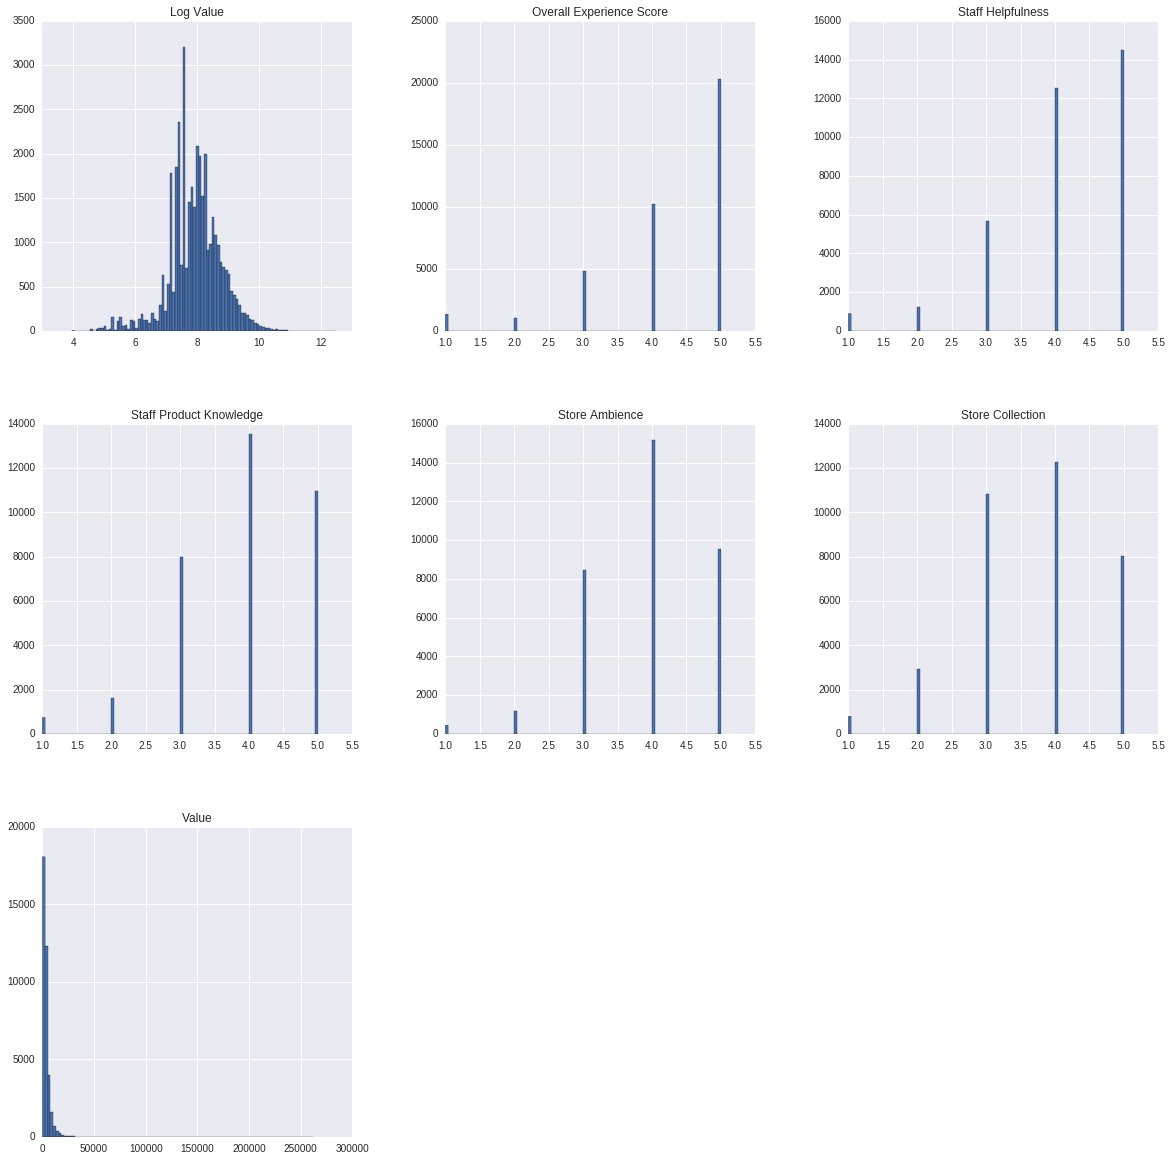

In [34]:
df2.hist(bins=100,figsize=(20,20))

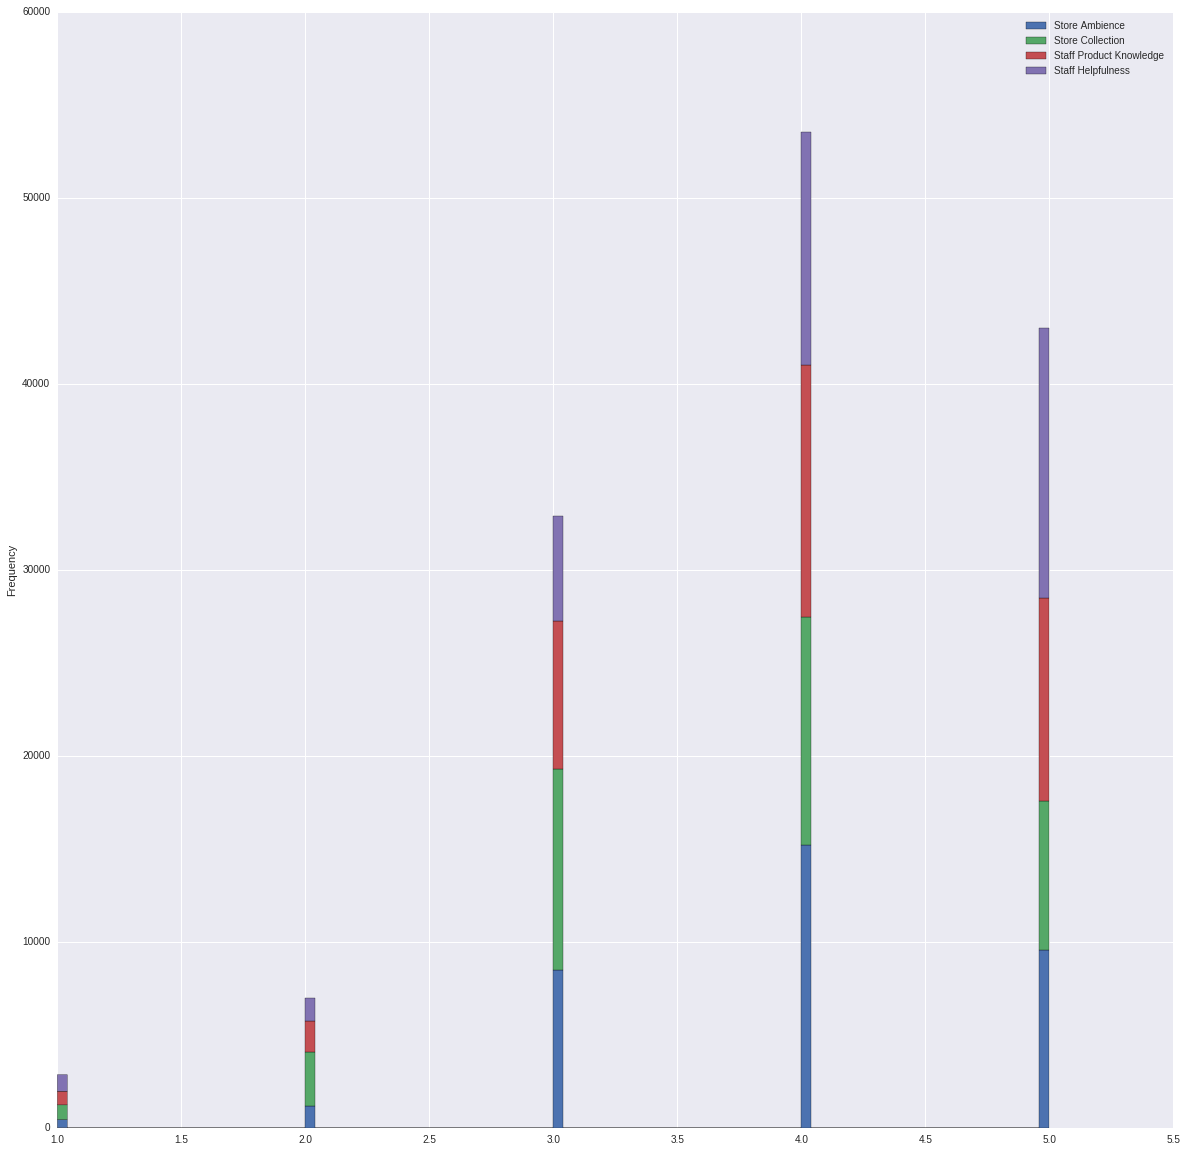

In [35]:
df2[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(20,20))

# Count of different store locations

In [36]:
df2['Store Location(Touchpoint name)'].nunique()

198

# Counts of store at each location

In [37]:
df2['Store Location(Touchpoint name)'].value_counts()

CLB-COLABA                   700
HYD-HYDERABAD                675
AAS-AHMEDABAD                497
CTR-COIMBATORE               492
AND-ANDHERI                  472
BHU-BHUBANESHWAR             460
MDT-CHENNAI                  456
VDS-VARANASI                 429
SRT-SURAT                    429
GUH-GUWAHTI                  422
PTN-PATANA                   414
MEX-CHENNAI                  413
MFS-CHENNAI                  398
MDY-CHENNAI                  391
CSC-KOLKATA                  390
SWD- VASHI  SEEWOOD          378
GGN-GANGANAGAR               373
MVS-CHENNAI                  356
PUN-PUNE                     343
PMG-PUNE                     336
ABD-AHMEDABAD                333
PBS-PATANA                   330
MCP-CHENNAI                  329
MKS-CHENNAI                  329
JBL-JABALPUR                 328
PTA-PATIALA                  324
CSD-CHANDIGARH               311
BGB-BANGALURU                308
MDN-CHENNAI                  308
MUS-MADHURAI                 306
          

# Analysis for Store Location 'CLB-COLABA'

In [38]:
df4=df2.loc[df2['Store Location(Touchpoint name)'] == 'CLB-COLABA']

In [39]:
df4.head()

Store Location(Touchpoint name) Date of Request Date of Response Language  \
2                        CLB-COLABA  30/12/17 15:22   01/01/18 10:03  english   
4                        CLB-COLABA  30/12/17 15:22   01/01/18 15:57  english   
20                       CLB-COLABA  02/01/18 15:28   02/01/18 15:56  english   
29                       CLB-COLABA  02/01/18 15:30   02/01/18 16:05  english   
156                      CLB-COLABA  02/01/18 15:28   02/01/18 19:24  english   

    Date of Transaction                                   Product Category  \
2              29/12/17  CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT   
4              29/12/17                                           DAVINCHI   
20             30/12/17         MOC/DER/BOOT GT, PRO, LEE COOPER, BUCKAROO   
29             31/12/17                               PRINCESS, FANCY (LT)   
156            30/12/17                                        SPORTS (LT)   

    Responded Using Storeid  Overall Experience Score  \
2          REMINDER     CLB                       5.0   
4          REMINDER     CLB                       4.0   
20       INVITATION     CLB                       5.0   
29       INVITATION     CLB                       5.0   
156      INVITATION     CLB                       5.0   

                      Comment    Value  Store Ambience  Store Collection  \
2    It was a good experience   4070.0             5.0               5.0   
4       Service was very good   9990.0             3.0               3.0   
20                   All good  10509.0             4.0               4.0   
29                        NaN   5280.0             4.0               5.0   
156                Keep it up   1890.0             3.0               3.0   

     Staff Product Knowledge  Staff Helpfulness  Log Value  
2                        4.0                5.0   8.311398  
4                        3.0                3.0   9.209340  
20                       5.0                5.0   9.259987  
29                       5.0                5.0   8.571681  
156                      3.0                5.0   7.544332

In [40]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 700 entries, 2 to 37775
Data columns (total 16 columns):
Store Location(Touchpoint name)    700 non-null object
Date of Request                    700 non-null object
Date of Response                   700 non-null object
Language                           700 non-null object
Date of Transaction                700 non-null object
Product Category                   700 non-null object
Responded Using                    700 non-null object
Storeid                            700 non-null object
Overall Experience Score           700 non-null float64
Comment                            543 non-null object
Value                              700 non-null float64
Store Ambience                     634 non-null float64
Store Collection                   634 non-null float64
Staff Product Knowledge            634 non-null float64
Staff Helpfulness                  634 non-null float64
Log Value                          700 non-null float64
dtypes

In [41]:
df4['Product Category'].nunique()

374

In [46]:
df4['Overall Experience Score'].value_counts()

5.0    419
4.0    190
3.0     70
2.0     12
1.0      9
Name: Overall Experience Score, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f3894d177d0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f388d6aaa90>]], dtype=object)

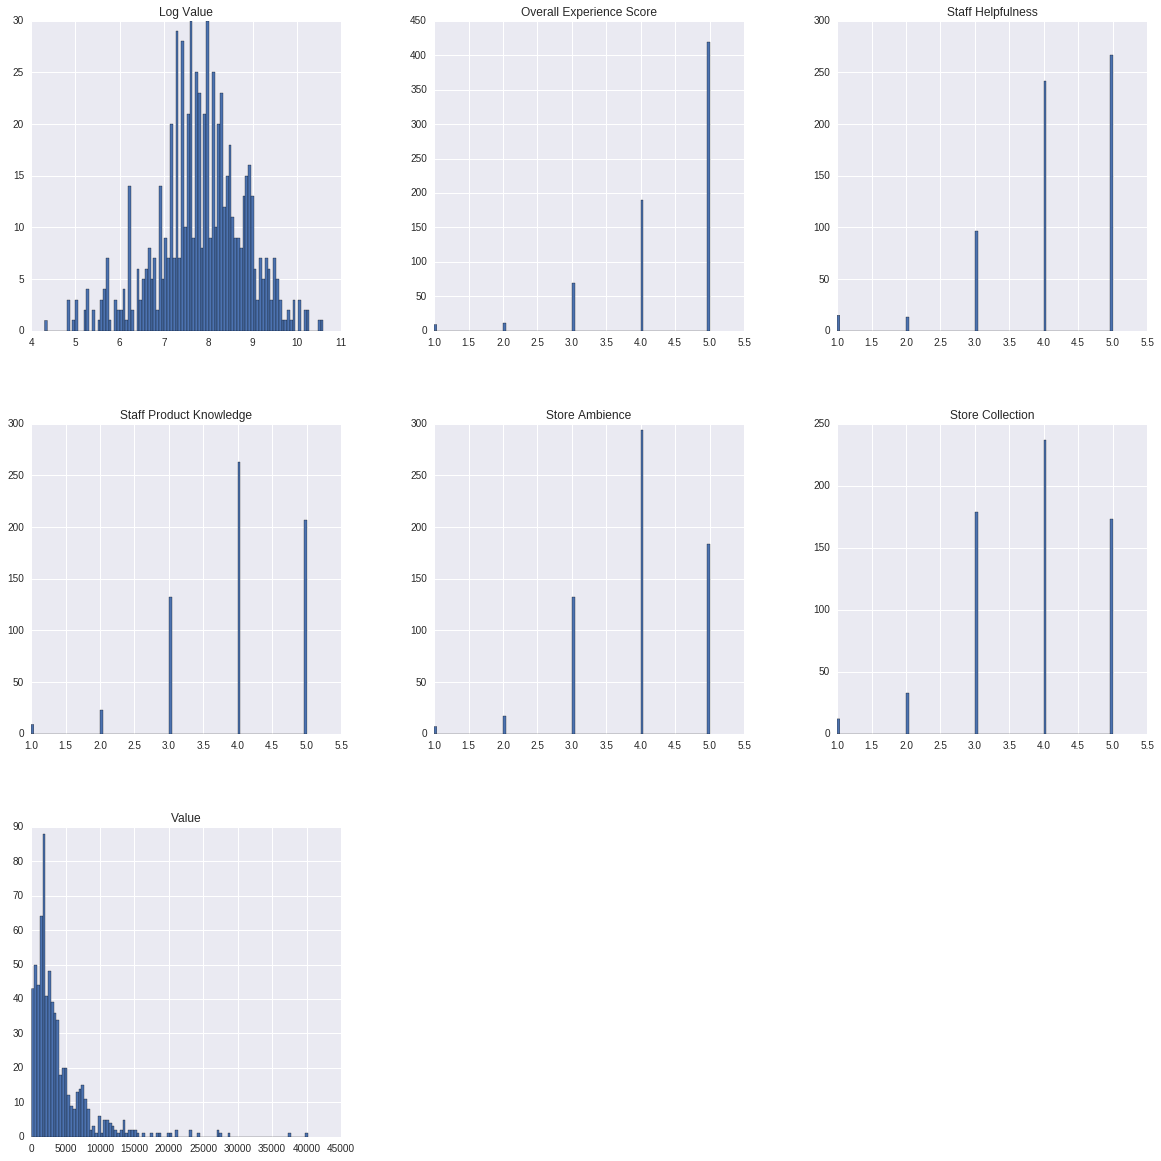

In [37]:
df4.hist(bins=100,figsize=(20,20))

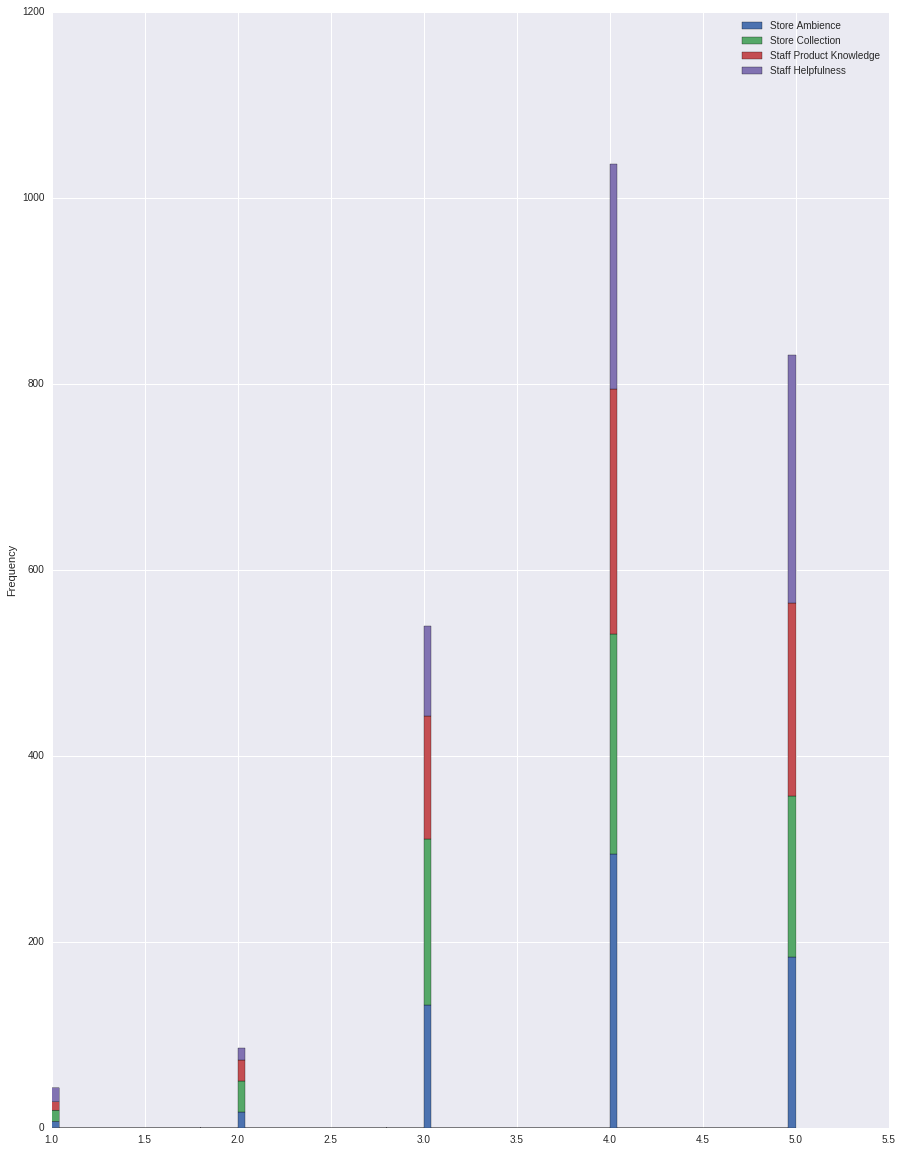

In [38]:
df4[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

In [39]:
st=df2['Comment'].to_string()

# Printing the various tokens in the comments

In [40]:
tokens=st.split()
tokens

[u'0',
 u'Variety',
 u'of',
 u'shoes',
 u'can',
 u'be',
 u'increased',
 u'1',
 u'add',
 u'more',
 u'varieties',
 u'to',
 u'your',
 u'store',
 u'2',
 u'It',
 u'was',
 u'a',
 u'good',
 u'experience',
 u'3',
 u'Introduce',
 u'new',
 u'collection.\\nSend',
 u'messages',
 u'to',
 u'cu...',
 u'4',
 u'Service',
 u'was',
 u'very',
 u'good',
 u'5',
 u'NaN',
 u'6',
 u'NaN',
 u'7',
 u'Please',
 u'increase',
 u'variety',
 u'in',
 u'stock',
 u'8',
 u'All',
 u'ok',
 u'9',
 u'Very',
 u'courteous',
 u'staff',
 u'10',
 u'Pine',
 u'ka',
 u'Pani',
 u'ka',
 u'nahi',
 u'puchte',
 u'\\nHa',
 u'ha',
 u'ha',
 u'ha',
 u'\\nJu...',
 u'11',
 u'Nothing',
 u'to',
 u'suggest',
 u'12',
 u'Variety',
 u'and',
 u'products',
 u'not',
 u'avaipable',
 u'13',
 u'Continue',
 u'your',
 u'Good',
 u'petf',
 u'14',
 u'NaN',
 u'15',
 u'NaN',
 u'16',
 u'You',
 u'guys',
 u'are',
 u'perfect',
 u'17',
 u'New',
 u'designed',
 u'not',
 u'available',
 u'please.',
 u'New',
 u'18',
 u'NaN',
 u'19',
 u'You',
 u'should.',
 u'Have',
 u'coll

# Printing stop words

In [41]:
from nltk.corpus import stopwords
stop = set(stopwords.words('english'))

In [42]:
stop

{u'a',
 u'about',
 u'above',
 u'after',
 u'again',
 u'against',
 u'ain',
 u'all',
 u'am',
 u'an',
 u'and',
 u'any',
 u'are',
 u'aren',
 u"aren't",
 u'as',
 u'at',
 u'be',
 u'because',
 u'been',
 u'before',
 u'being',
 u'below',
 u'between',
 u'both',
 u'but',
 u'by',
 u'can',
 u'couldn',
 u"couldn't",
 u'd',
 u'did',
 u'didn',
 u"didn't",
 u'do',
 u'does',
 u'doesn',
 u"doesn't",
 u'doing',
 u'don',
 u"don't",
 u'down',
 u'during',
 u'each',
 u'few',
 u'for',
 u'from',
 u'further',
 u'had',
 u'hadn',
 u"hadn't",
 u'has',
 u'hasn',
 u"hasn't",
 u'have',
 u'haven',
 u"haven't",
 u'having',
 u'he',
 u'her',
 u'here',
 u'hers',
 u'herself',
 u'him',
 u'himself',
 u'his',
 u'how',
 u'i',
 u'if',
 u'in',
 u'into',
 u'is',
 u'isn',
 u"isn't",
 u'it',
 u"it's",
 u'its',
 u'itself',
 u'just',
 u'll',
 u'm',
 u'ma',
 u'me',
 u'mightn',
 u"mightn't",
 u'more',
 u'most',
 u'mustn',
 u"mustn't",
 u'my',
 u'myself',
 u'needn',
 u"needn't",
 u'no',
 u'nor',
 u'not',
 u'now',
 u'o',
 u'of',
 u'off',
 

# Removing the stopwords

In [43]:
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)

print result

0 Variety shoes increased 1 add varieties store 2 good experience 3 Introduce new collection.\nSend messages cu... 4 Service good 5 NaN 6 NaN 7 Please increase variety stock 8 ok 9 courteous staff 10 Pine ka Pani ka nahi puchte \nHa ha ha ha \nJu... 11 Nothing suggest 12 Variety products avaipable 13 Continue Good petf 14 NaN 15 NaN 16 guys perfect 17 New designed available please. New 18 NaN 19 should. collections 20 good 21 NaN 22 NaN 23 Keep good work 24 New arrive sandles 25 Increase colletion 26 Good 27 variety flat sandals shoes.... 28 good 29 NaN 30 Keep stock. 31 come old bio foot cannot che... 32 Stock 33 Budget product 34 Low price slippers av 35 wireless Credit Card machines ... 36 Everything good.Just one feedback staff sh... 37 less variety bellies. 38 store verities will... 39 NaN 40 good service 41 good 42 NaN 43 Product range wider 44 NaN 45 Need brands higher range 46 Increase range keep hard floor walk to... 47 Service improved 48 Plz increase variety crocs Ldh store 

# Removing the numerics

In [44]:
result=''.join([i for i in result if not i.isdigit()])

In [45]:
l=result.split()
l

[u'Variety',
 u'shoes',
 u'increased',
 u'add',
 u'varieties',
 u'store',
 u'good',
 u'experience',
 u'Introduce',
 u'new',
 u'collection.\\nSend',
 u'messages',
 u'cu...',
 u'Service',
 u'good',
 u'NaN',
 u'NaN',
 u'Please',
 u'increase',
 u'variety',
 u'stock',
 u'ok',
 u'courteous',
 u'staff',
 u'Pine',
 u'ka',
 u'Pani',
 u'ka',
 u'nahi',
 u'puchte',
 u'\\nHa',
 u'ha',
 u'ha',
 u'ha',
 u'\\nJu...',
 u'Nothing',
 u'suggest',
 u'Variety',
 u'products',
 u'avaipable',
 u'Continue',
 u'Good',
 u'petf',
 u'NaN',
 u'NaN',
 u'guys',
 u'perfect',
 u'New',
 u'designed',
 u'available',
 u'please.',
 u'New',
 u'NaN',
 u'should.',
 u'collections',
 u'good',
 u'NaN',
 u'NaN',
 u'Keep',
 u'good',
 u'work',
 u'New',
 u'arrive',
 u'sandles',
 u'Increase',
 u'colletion',
 u'Good',
 u'variety',
 u'flat',
 u'sandals',
 u'shoes....',
 u'good',
 u'NaN',
 u'Keep',
 u'stock.',
 u'come',
 u'old',
 u'bio',
 u'foot',
 u'cannot',
 u'che...',
 u'Stock',
 u'Budget',
 u'product',
 u'Low',
 u'price',
 u'slippers'

# Removing the not defined values

In [4]:
try:
    [i for i in l if str(i) != 'nan']
except:
    do nothi
    
    

In [ ]:

for word in list(l):  
    l.remove(u'NaN')

# Printing clean data

In [ ]:
l

In [ ]:
s=' '.join(l)

In [ ]:
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')

answer = ''.join(filter(whitelist.__contains__,s))

# Word Cloud of all comments

In [ ]:
import nltk
from wordcloud import WordCloud
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()


# Word Cloud for only store at Colaba

In [ ]:
st=df4['Comment'].to_string()
tokens=st.split()
stop = set(stopwords.words('english'))
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)
result=''.join([i for i in result if not i.isdigit()])
l=result.split()
[i for i in l if str(i) != 'nan']

In [ ]:
for word in list(l):  
    l.remove(u'NaN')

In [ ]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()


# Analysis for Store Location 'HYD-HYDERABAD'

In [ ]:
df5=df2.loc[df2['Store Location(Touchpoint name)'] == 'HYD-HYDERABAD']
df5.head()

In [ ]:
df5.info()

In [ ]:
df5.hist(bins=100,figsize=(20,20))

In [ ]:
df5[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

In [ ]:
st=df5['Comment'].to_string()
tokens=st.split()
stop = set(stopwords.words('english'))
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)
result=''.join([i for i in result if not i.isdigit()])
l=result.split()
[i for i in l if str(i) != 'nan']

In [ ]:
for word in list(l):  
    l.remove(u'NaN')

In [ ]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()


# Analysis for Store Location 'AAS-AHMEDABAD'

In [ ]:
df6=df2.loc[df2['Store Location(Touchpoint name)'] == 'AAS-AHMEDABAD']
df6.head()

In [ ]:
df6.info()

In [ ]:
df6['Value']=np.log(df6['Value'])

In [ ]:
df6.hist(bins=100,figsize=(20,20))

In [ ]:
df6[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

# Cleaning the comments

In [ ]:
st=df6['Comment'].to_string()
tokens=st.split()
stop = set(stopwords.words('english'))
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)
result=''.join([i for i in result if not i.isdigit()])
l=result.split()
[i for i in l if str(i) != 'nan']

In [ ]:
for word in list(l):  
    l.remove(u'NaN')

# Wordcloud of comments

In [ ]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()


# Analysis for Store Location 'CTR-COIMBATORE'

In [ ]:
df7=df2.loc[df2['Store Location(Touchpoint name)'] == 'CTR-COIMBATORE']
df7.head()

In [ ]:
df7.info()

In [ ]:
df7['Value']=np.log(df7['Value'])

In [47]:
df7.hist(bins=100,figsize=(20,20))

NameError: name 'df7' is not defined

In [48]:
df7[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

NameError: name 'df7' is not defined

# Cleaning data

In [95]:
st=df7['Comment'].to_string()
tokens=st.split()
stop = set(stopwords.words('english'))
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)
result=''.join([i for i in result if not i.isdigit()])
l=result.split()
[i for i in l if str(i) != 'nan']

UnicodeEncodeError: 'ascii' codec can't encode characters in position 4-5: ordinal not in range(128)

In [96]:
for word in list(l):  
    l.remove(u'NaN')

ValueError: list.remove(x): x not in list

# Wordcloud of comments

In [97]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()

# Analysis for Store Location 'AND-ANDHERI'

In [98]:
df8=df2.loc[df2['Store Location(Touchpoint name)'] == 'AND-ANDHERI']
df8.head()

Store Location(Touchpoint name) Date of Request Date of Response Language  \
37                      AND-ANDHERI  02/01/18 15:31   02/01/18 16:18  english   
151                     AND-ANDHERI  02/01/18 15:27   02/01/18 18:48  english   
184                     AND-ANDHERI  02/01/18 15:31    03/01/18 9:50  english   
189                     AND-ANDHERI  02/01/18 15:30   03/01/18 12:10  english   
222                     AND-ANDHERI  03/01/18 15:16   03/01/18 15:31  english   

    Date of Transaction                                   Product Category  \
37             31/12/17  DAVINCHI, PRO, DV SOCKS, DV SOCKS, DV SOCKS, M...   
151            30/12/17                                 CLARKS-LT, ZIOLITE   
184            31/12/17                           CHP-FLT/DAB/CUT, ZIOLITE   
189            31/12/17                             LEE COOPER, LEE COOPER   
222            02/01/18                                 PLATFORM (LT), PRO   

    Responded Using Storeid  Overall Experience Score  \
37       INVITATION     AND                       4.0   
151      INVITATION     AND                       5.0   
184      INVITATION     AND                       5.0   
189      INVITATION     AND                       4.0   
222      INVITATION     AND                       5.0   

                                               Comment   Value  \
37                  There  is less variety in bellies.  8755.0   
151                                          Very nice  4259.0   
184                                                NaN  1810.0   
189  Customer service staff was very helpful.\nHowe...  5198.0   
222                    Get  something  Amazing  latest  2040.0   

     Store Ambience  Store Collection  Staff Product Knowledge  \
37              4.0               3.0                      4.0   
151             4.0               4.0                      4.0   
184             5.0               5.0                      5.0   
189             3.0               3.0                      5.0   
222             5.0               5.0                      4.0   

     Staff Helpfulness  Log Value  
37                 4.0   9.077380  
151                4.0   8.356790  
184                5.0   7.501082  
189                5.0   8.556029  
222                5.0   7.620705

In [99]:
df8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 472 entries, 37 to 37705
Data columns (total 16 columns):
Store Location(Touchpoint name)    472 non-null object
Date of Request                    472 non-null object
Date of Response                   472 non-null object
Language                           472 non-null object
Date of Transaction                472 non-null object
Product Category                   472 non-null object
Responded Using                    472 non-null object
Storeid                            472 non-null object
Overall Experience Score           472 non-null float64
Comment                            367 non-null object
Value                              472 non-null float64
Store Ambience                     433 non-null float64
Store Collection                   433 non-null float64
Staff Product Knowledge            433 non-null float64
Staff Helpfulness                  433 non-null float64
Log Value                          472 non-null float64
dtype

In [100]:
df8['Value']=np.log(df8['Value'])

/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adf506850>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ade1ea910>]], dtype=object)

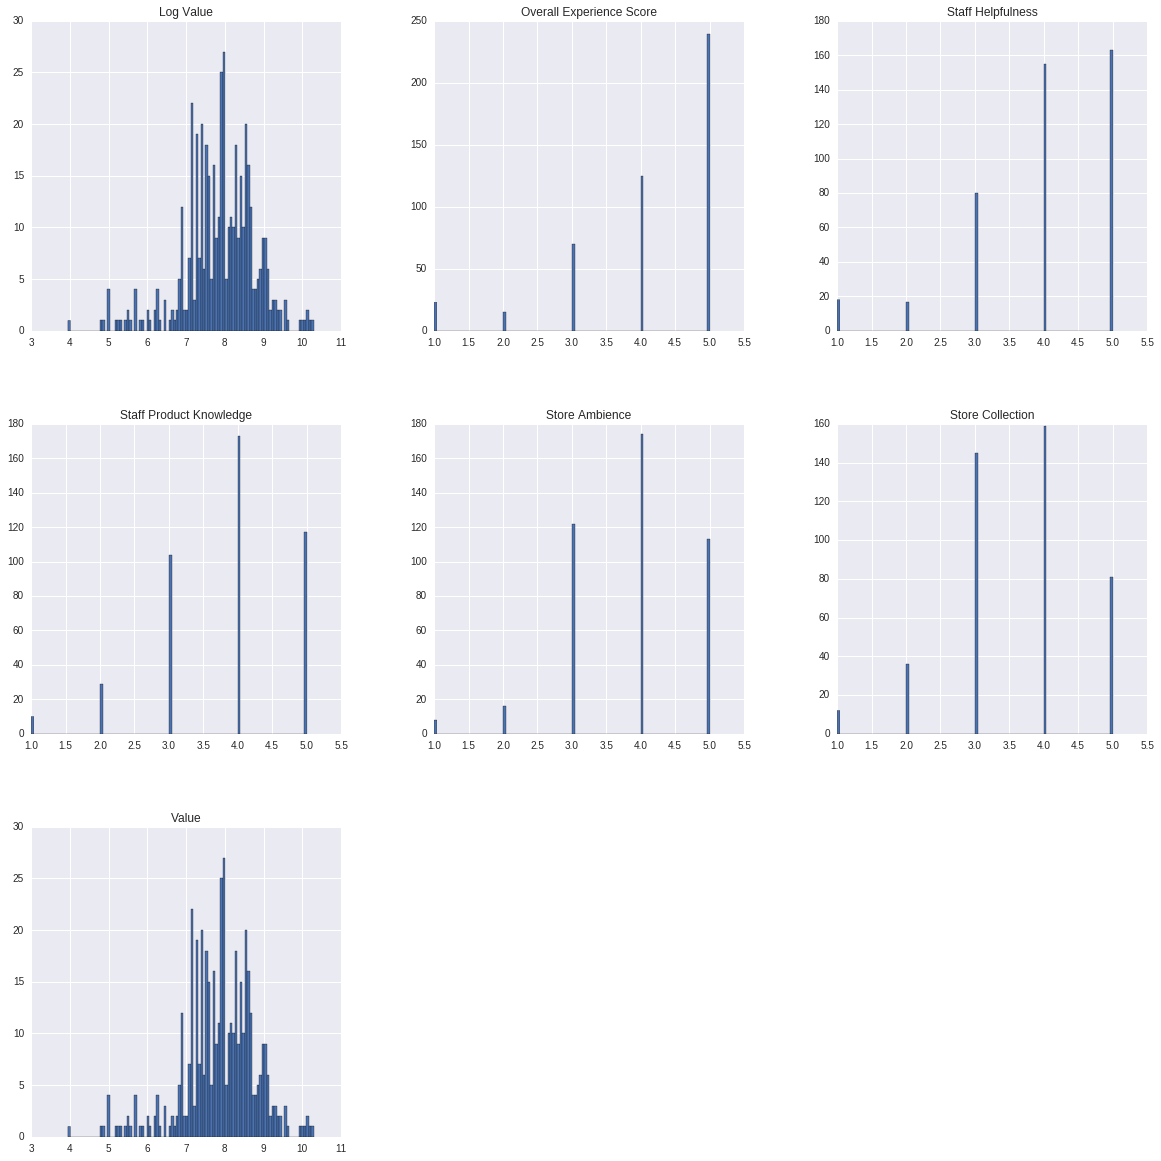

In [101]:
df8.hist(bins=100,figsize=(20,20))

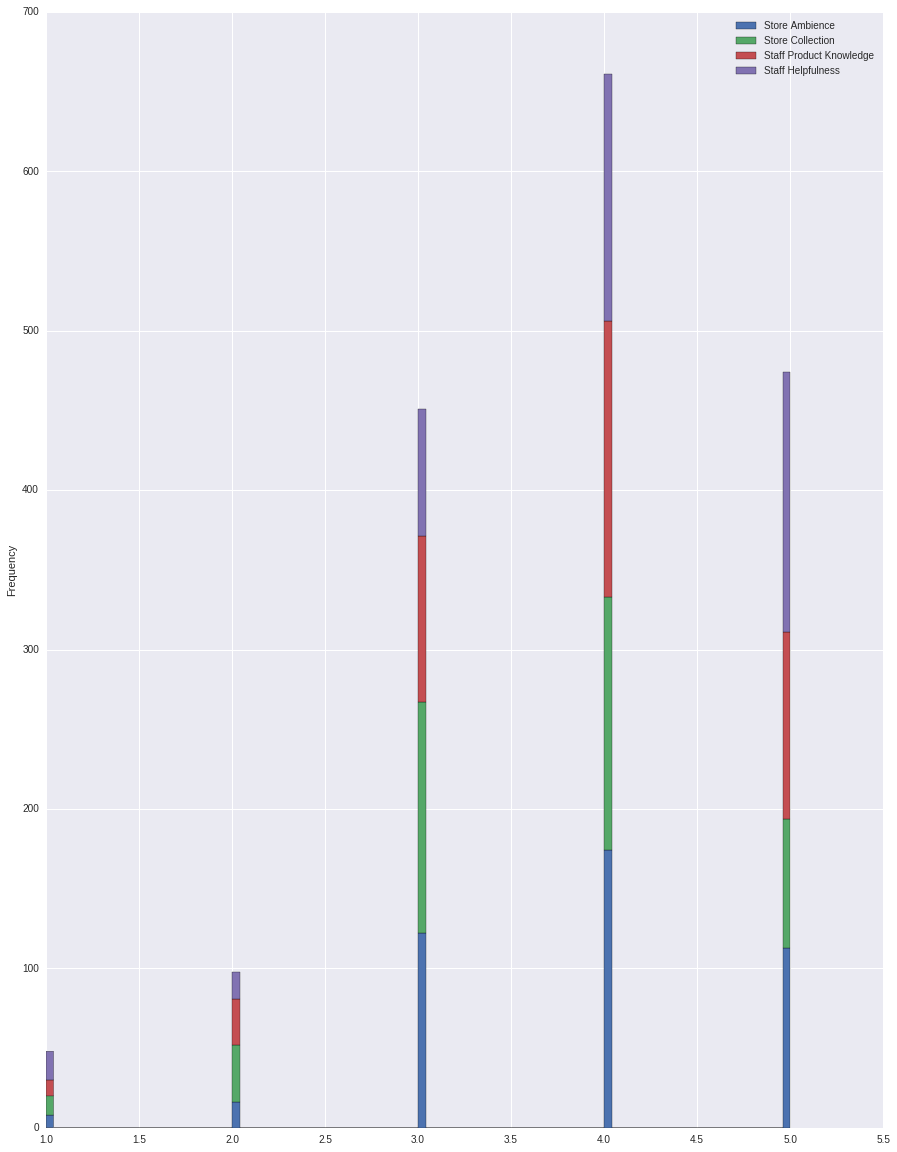

In [102]:
df8[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

# Cleaning data

In [103]:
st=df8['Comment'].to_string()
tokens=st.split()
stop = set(stopwords.words('english'))
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)
result=''.join([i for i in result if not i.isdigit()])
l=result.split()
[i for i in l if str(i) != 'nan']

UnicodeEncodeError: 'ascii' codec can't encode characters in position 8-10: ordinal not in range(128)

In [104]:
for word in list(l):  
    l.remove(u'NaN')

ValueError: list.remove(x): x not in list

# Wordcloud of comments

In [105]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()

# Analysis of store location "BST-Bangaluru"

In [106]:
df9=df2.loc[df2['Store Location(Touchpoint name)'] == 'BST-BANGALURU']
df9.head()

Store Location(Touchpoint name) Date of Request Date of Response  \
14402                   BST-BANGALURU   13/03/18 9:21   14/03/18 11:14   
18697                   BST-BANGALURU  31/03/18 16:41   31/03/18 17:05   

      Language Date of Transaction      Product Category Responded Using  \
14402  english            08/03/18  MOC/DER/BOOT GT, PRO        REMINDER   
18697  english            30/03/18       MOC/DER/BOOT GT      INVITATION   

      Storeid  Overall Experience Score      Comment   Value  Store Ambience  \
14402     BST                       3.0  Nil nothing  4039.0             3.0   
18697     BST                       4.0          NaN  3990.0             NaN   

       Store Collection  Staff Product Knowledge  Staff Helpfulness  Log Value  
14402               2.0                      3.0                3.0   8.303752  
18697               NaN                      NaN                NaN   8.291547

In [107]:
df9.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2 entries, 14402 to 18697
Data columns (total 16 columns):
Store Location(Touchpoint name)    2 non-null object
Date of Request                    2 non-null object
Date of Response                   2 non-null object
Language                           2 non-null object
Date of Transaction                2 non-null object
Product Category                   2 non-null object
Responded Using                    2 non-null object
Storeid                            2 non-null object
Overall Experience Score           2 non-null float64
Comment                            1 non-null object
Value                              2 non-null float64
Store Ambience                     1 non-null float64
Store Collection                   1 non-null float64
Staff Product Knowledge            1 non-null float64
Staff Helpfulness                  1 non-null float64
Log Value                          2 non-null float64
dtypes: float64(7), object(9)
memory

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ade1a2350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1adc263b10>]], dtype=object)

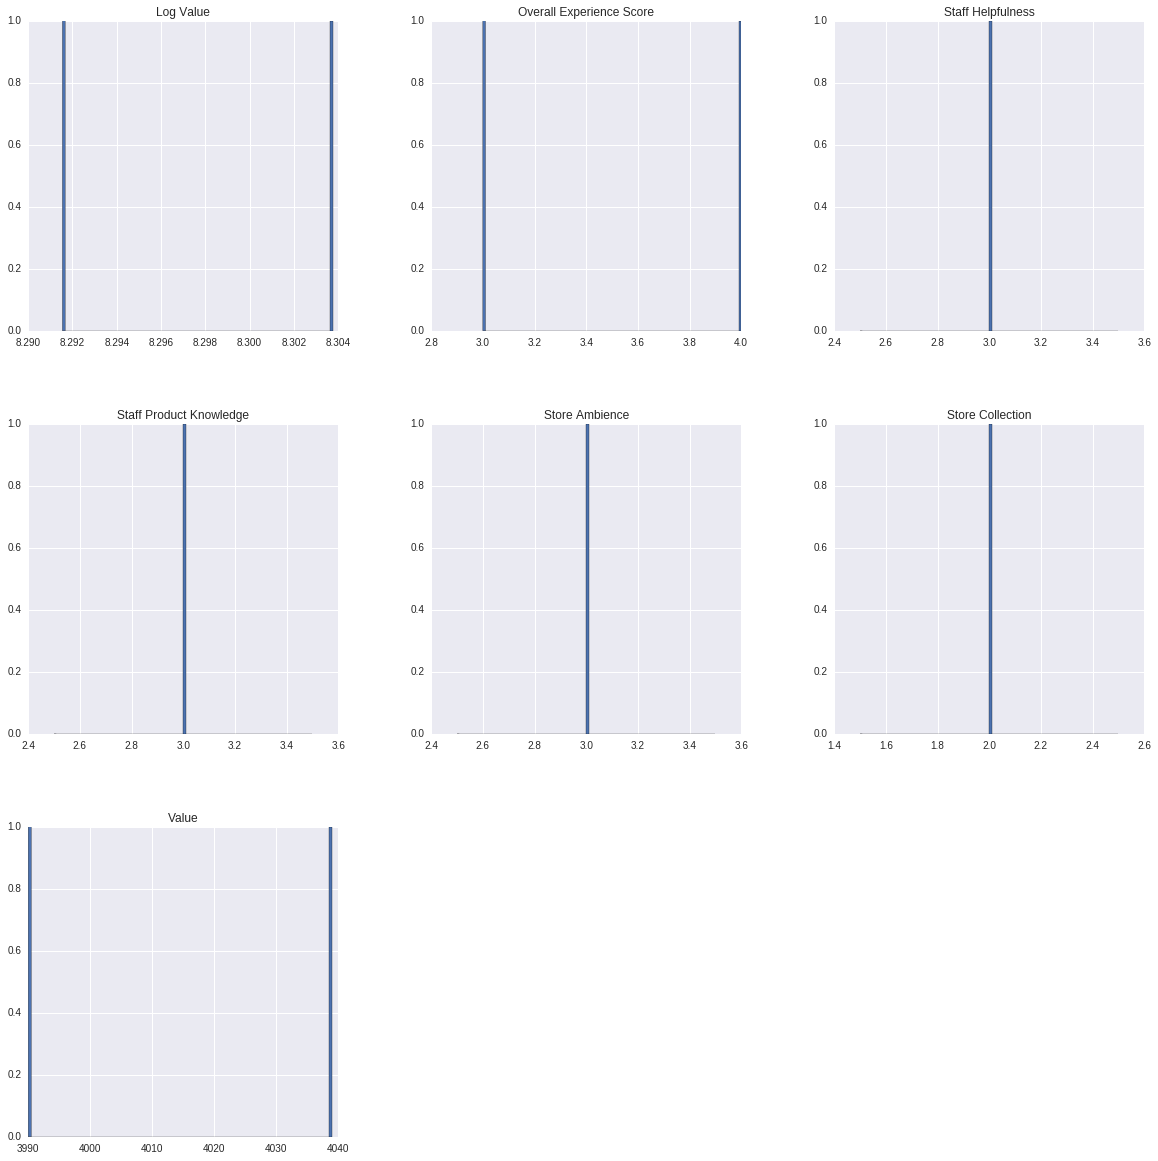

In [108]:
df9.hist(bins=100,figsize=(20,20))

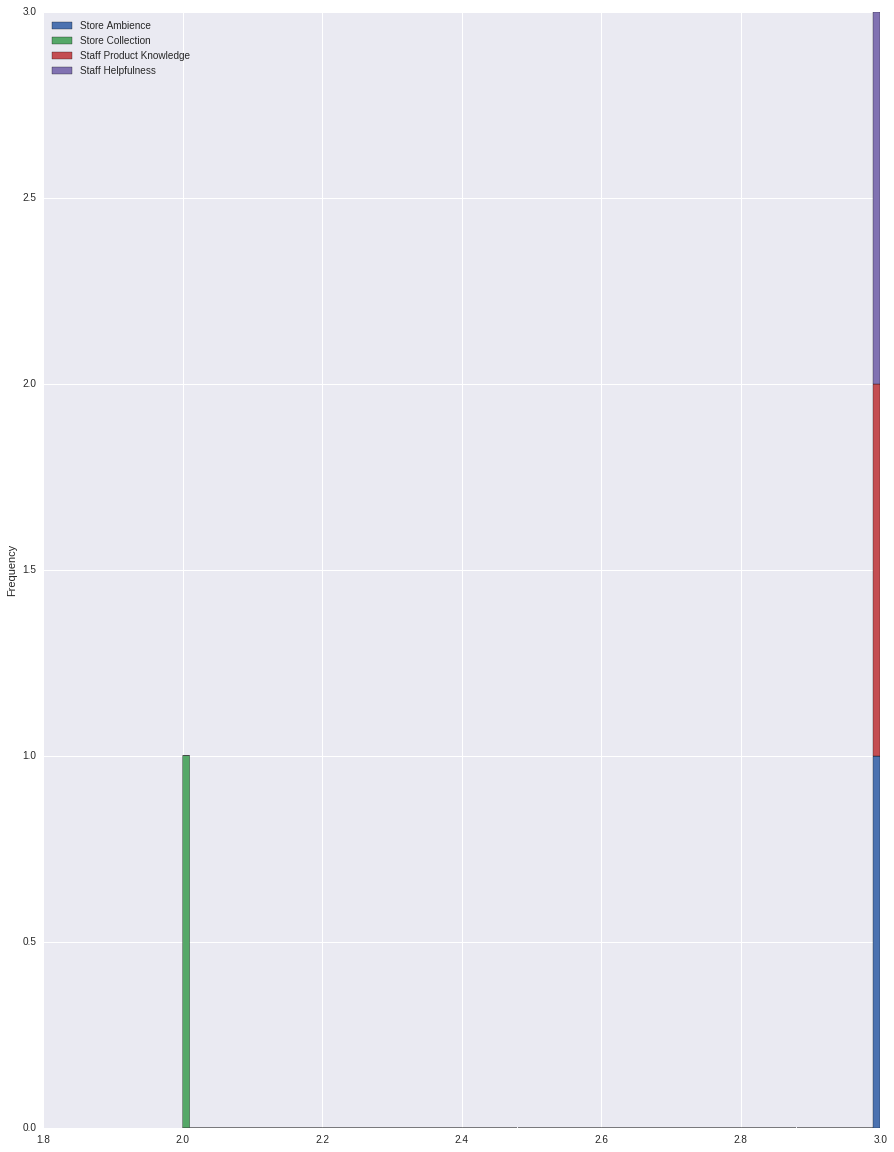

In [109]:
df9[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

# Cleaning data

In [113]:
st=df9['Comment'].to_string()
tokens=st.split()
stop = set(stopwords.words('english'))
resultwords  = [word for word in tokens if word.lower() not in stop]
result = ' '.join(resultwords)
result=''.join([i for i in result if not i.isdigit()])
l=result.split()
[i for i in l if str(i) != 'nan']

[u'Nil', u'nothing', u'NaN']

In [114]:
for word in list(l):  
    l.remove(u'NaN')

ValueError: list.remove(x): x not in list

# Wordcloud of comments

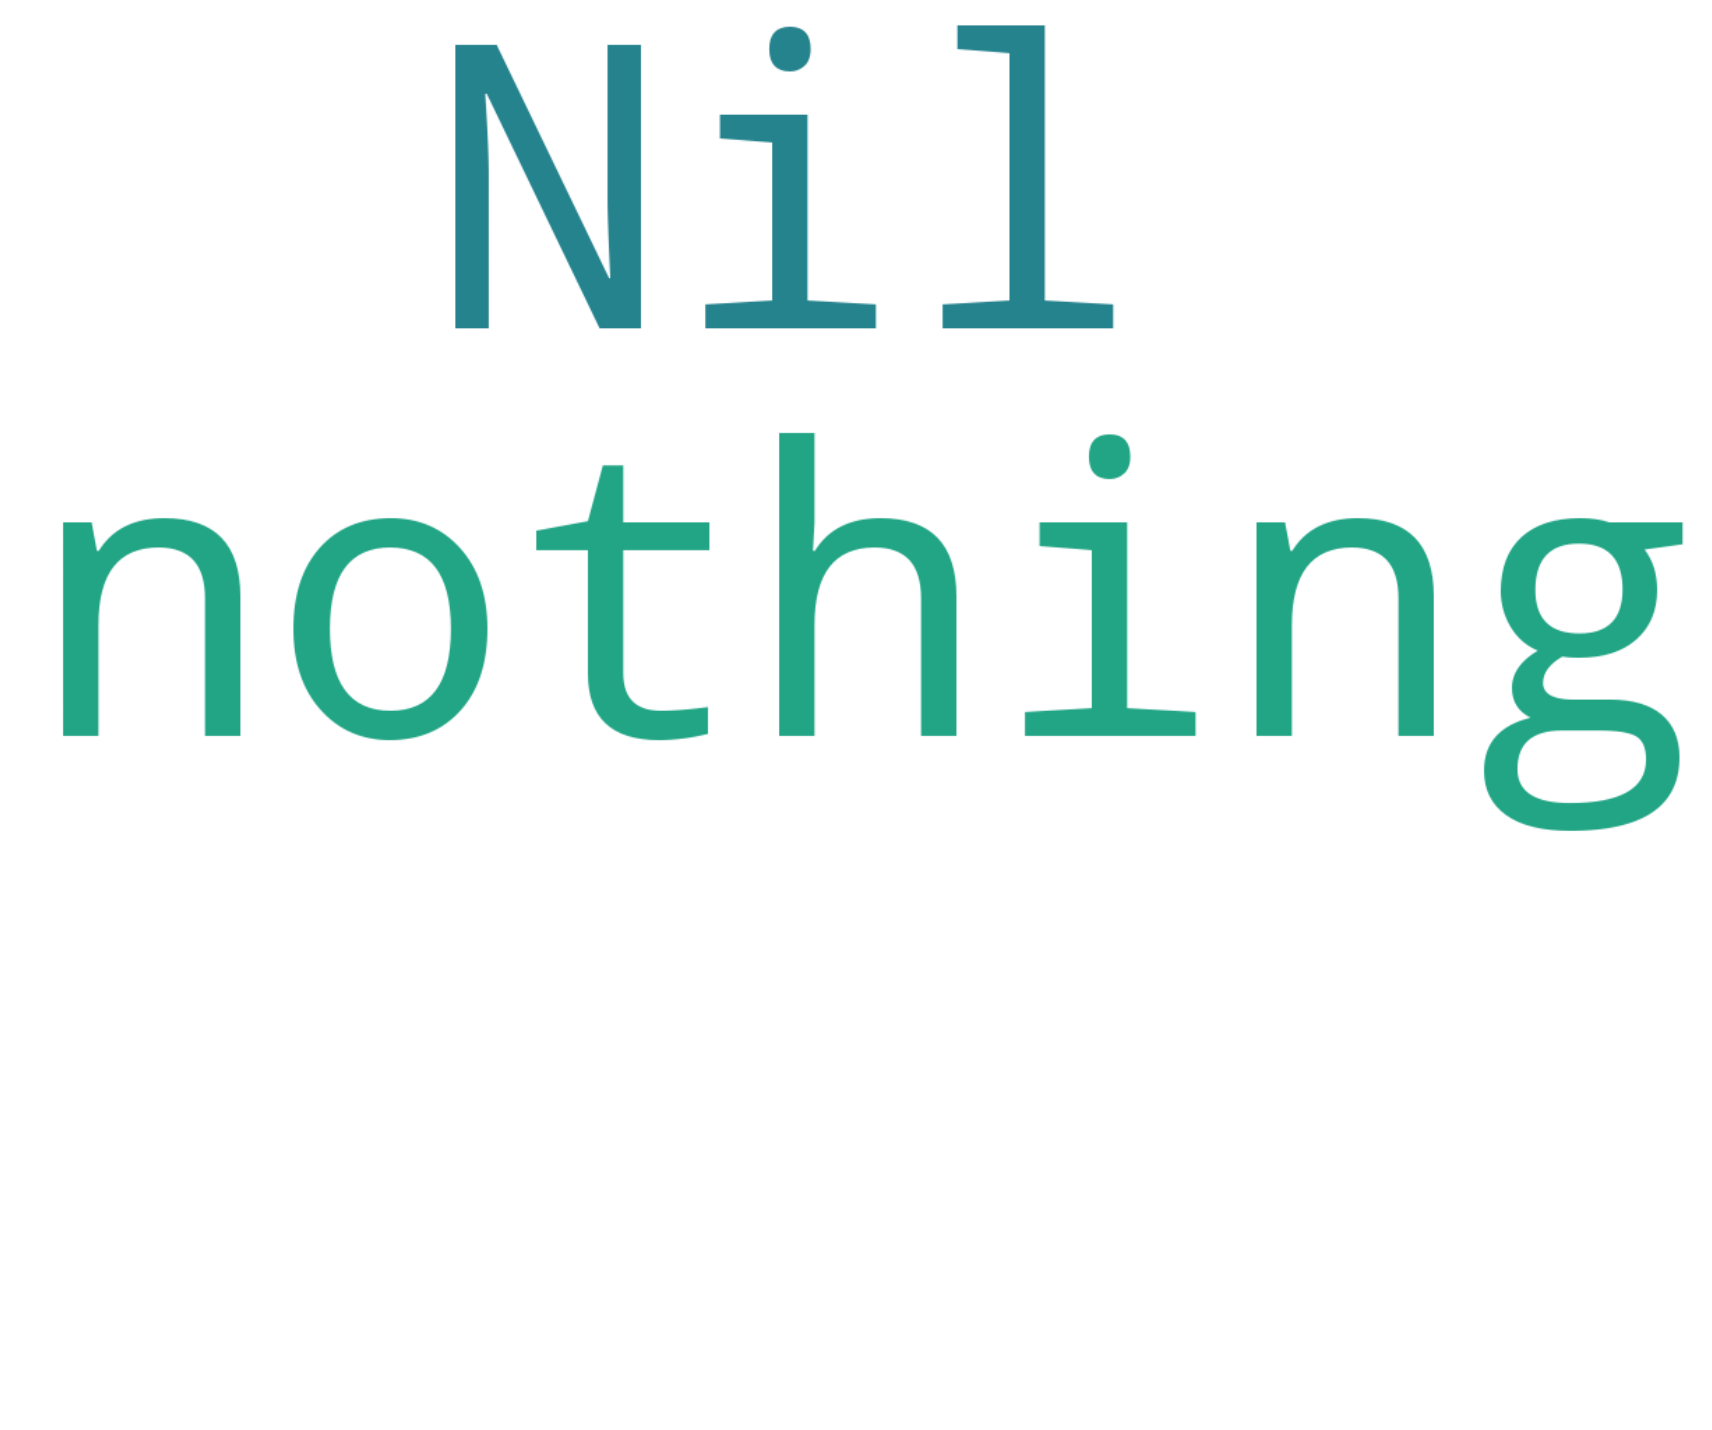

In [112]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()

# Finding 100 most common words in all comments

How many most common words to print: 100

OK. The 100 most common words are as follows

[u'good', u'collection', u'keep', u'service', u'variety', u'staff', u'nice', u'need', u'shoes', u'please', u'experience', u'excellent', u'collections', u'nothing', u'store', u'brand', u'improve', u'new', u'products', u'product', u'stock', u'sie', u'add', u'everything', u'increase', u'sies', u'overall', u'customer', u'available', u'varieties', u'quality', u'range', u'price', u'great', u'get', u'ok', u'best', u'like', u'n', u'discount', u'well', u'better', u'pl', u'every', u'services', u'designs', u'give', u'u', u'footwear', u'work', u'try', u'shop', u'less', u'satisfied', u'required', u'happy', u'sale', u'thanks', u'customers', u'kids', u'shoe', u'ur', u'suggestions', u'provide', u'bring', u'always', u'brands', u'ladies', u'fine', u'much', u'time', u'would', u'options', u'perfect', u'pls', u'make', u'high', u'already', u'r', u'one', u'gud', u'offers', u'helpful', u'thing', u'models', u'shopping', u'n

[(u'good', 6143),
 (u'collection', 2917),
 (u'keep', 1815),
 (u'service', 1672),
 (u'variety', 1395),
 (u'staff', 1264),
 (u'nice', 1226),
 (u'need', 1204),
 (u'shoes', 1196),
 (u'please', 1043),
 (u'experience', 971),
 (u'excellent', 926),
 (u'collections', 909),
 (u'nothing', 873),
 (u'store', 846),
 (u'brand', 843),
 (u'improve', 837),
 (u'new', 702),
 (u'products', 672),
 (u'product', 671),
 (u'stock', 647),
 (u'sie', 633),
 (u'add', 559),
 (u'everything', 546),
 (u'increase', 481),
 (u'sies', 464),
 (u'overall', 418),
 (u'customer', 417),
 (u'available', 415),
 (u'varieties', 409),
 (u'quality', 393),
 (u'range', 389),
 (u'price', 352),
 (u'great', 343),
 (u'get', 339),
 (u'ok', 334),
 (u'best', 332),
 (u'like', 325),
 (u'n', 314),
 (u'discount', 314),
 (u'well', 308),
 (u'better', 303),
 (u'pl', 300),
 (u'every', 299),
 (u'services', 286),
 (u'designs', 285),
 (u'give', 285),
 (u'u', 284),
 (u'footwear', 270),
 (u'work', 267),
 (u'try', 263),
 (u'shop', 258),
 (u'less', 251),
 (u

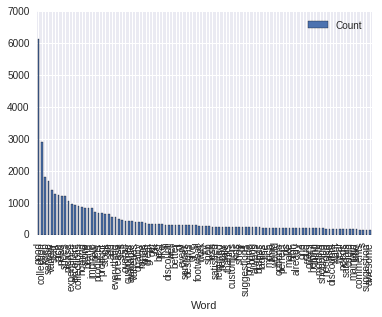

In [114]:
import collections
wordcount = {}
a=[]
# To eliminate duplicates, remember to split by punctuation, and use case demiliters.
for word in answer.lower().split():
    if word not in wordcount:
        wordcount[word] = 1
    else:
        wordcount[word] += 1
# Print most common word
n_print = int(input("How many most common words to print: "))
print("\nOK. The {} most common words are as follows\n".format(n_print))
word_counter = collections.Counter(wordcount)
for word, count in word_counter.most_common(n_print):
    a.append(word)
print(a)

lst = word_counter.most_common(n_print)
datafm = pd.DataFrame(lst, columns = ['Word', 'Count'])
datafm.plot.bar(x='Word',y='Count')
lst

In [116]:
resultwords  = [word for word in answer.split() if word.lower() not in a]
result = ' '.join(resultwords)

# Wordcloud after removing 100 most common words

In [117]:
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(result)
mat.pyplot.figure(figsize=(30,100))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()

In [119]:
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

# Analysis of store location "ALR-ALWAR"

In [115]:
df10=df2.loc[df2['Store Location(Touchpoint name)'] == 'ALR-ALWAR']
df10.head()

Store Location(Touchpoint name) Date of Request Date of Response  \
33576                       ALR-ALWAR  30/05/18 16:18   30/05/18 16:25   
33888                       ALR-ALWAR  31/05/18 18:31   31/05/18 18:53   
33904                       ALR-ALWAR  31/05/18 18:31   31/05/18 19:06   
34389                       ALR-ALWAR  01/06/18 16:48   02/06/18 18:17   
34861                       ALR-ALWAR  05/06/18 15:27   05/06/18 16:00   

      Language Date of Transaction                     Product Category  \
33576  english            29/05/18                      GNX SAND/KHILON   
33888  english            30/05/18   BELLY/COT/LJ, ZIOLITE, SANDAL (LT)   
33904    hindi            30/05/18  CHP-FLT/DAB/CUT, SOCKS, CASUAL BAGS   
34389  english            31/05/18                  FANCY (LT), ZIOLITE   
34861    hindi            03/06/18            CASUAL BAGS, ZIOLITE, PRO   

      Responded Using Storeid  Overall Experience Score  \
33576      INVITATION     ALR                       4.0   
33888      INVITATION     ALR                       5.0   
33904      INVITATION     ALR                       4.0   
34389        REMINDER     ALR                       3.0   
34861      INVITATION     ALR                       4.0   

                      Comment   Value  Store Ambience  Store Collection  \
33576                     NaN  1690.0             4.0               4.0   
33888  No suggestions at all.  3540.0             5.0               5.0   
33904                     NaN  3030.0             5.0               4.0   
34389     Ggh8hgggfjiihhggfff  1950.0             4.0               4.0   
34861                     NaN  2030.0             NaN               NaN   

       Staff Product Knowledge  Staff Helpfulness  Log Value  
33576                      4.0                4.0   7.432484  
33888                      5.0                5.0   8.171882  
33904                      5.0                5.0   8.016318  
34389                      4.0                4.0   7.575585  
34861                      NaN                NaN   7.615791

In [116]:
df10.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14 entries, 33576 to 37779
Data columns (total 16 columns):
Store Location(Touchpoint name)    14 non-null object
Date of Request                    14 non-null object
Date of Response                   14 non-null object
Language                           14 non-null object
Date of Transaction                14 non-null object
Product Category                   14 non-null object
Responded Using                    14 non-null object
Storeid                            14 non-null object
Overall Experience Score           14 non-null float64
Comment                            6 non-null object
Value                              14 non-null float64
Store Ambience                     11 non-null float64
Store Collection                   11 non-null float64
Staff Product Knowledge            11 non-null float64
Staff Helpfulness                  11 non-null float64
Log Value                          14 non-null float64
dtypes: float64(7), 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1adb5f9190>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ada332310>]], dtype=object)

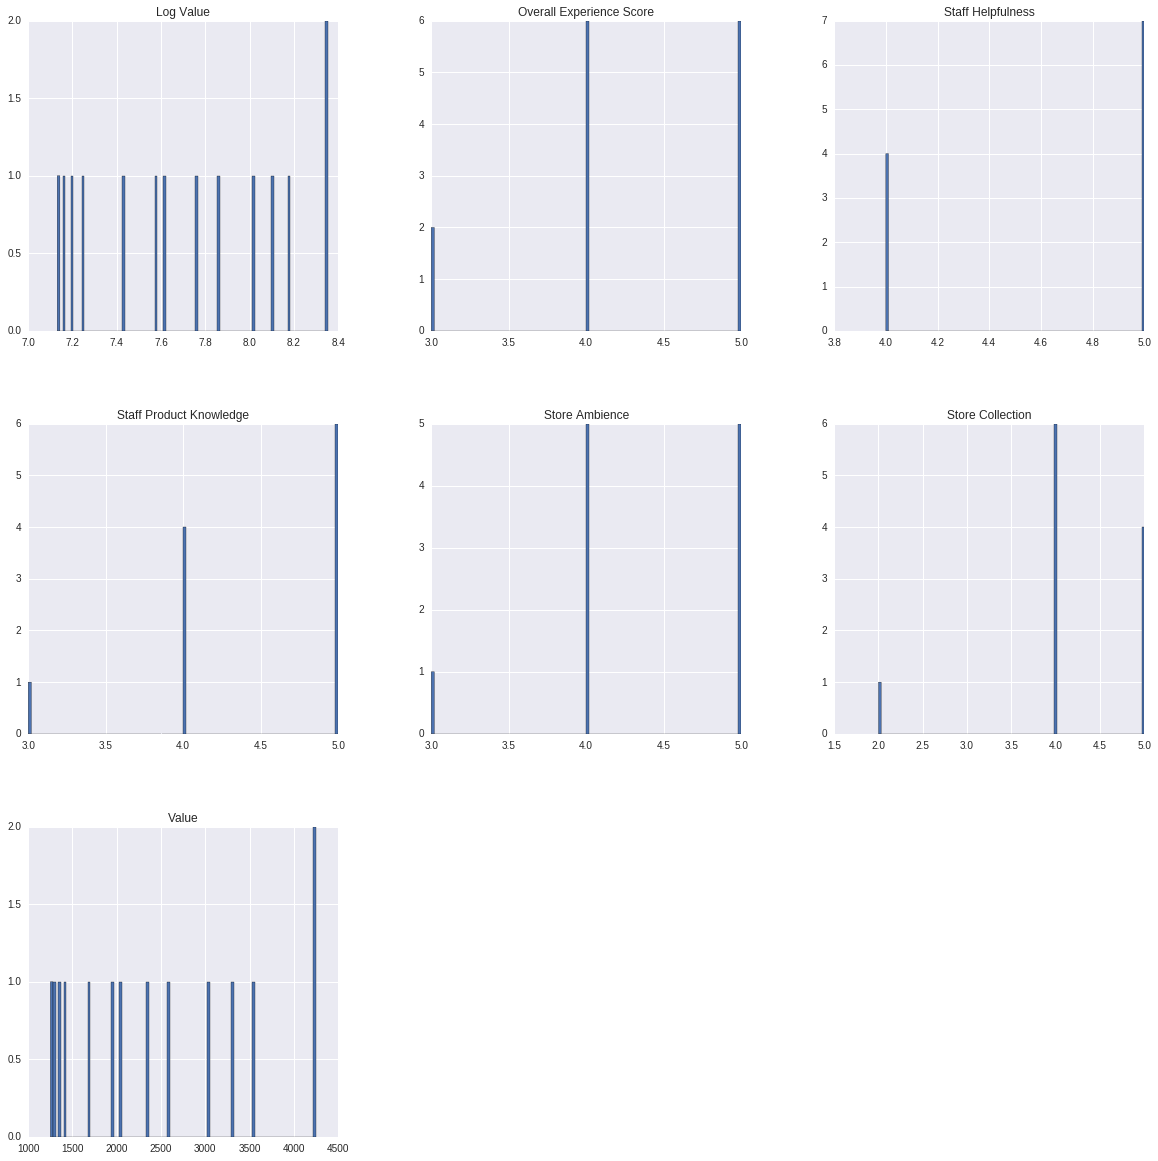

In [117]:
df10.hist(bins=100,figsize=(20,20))

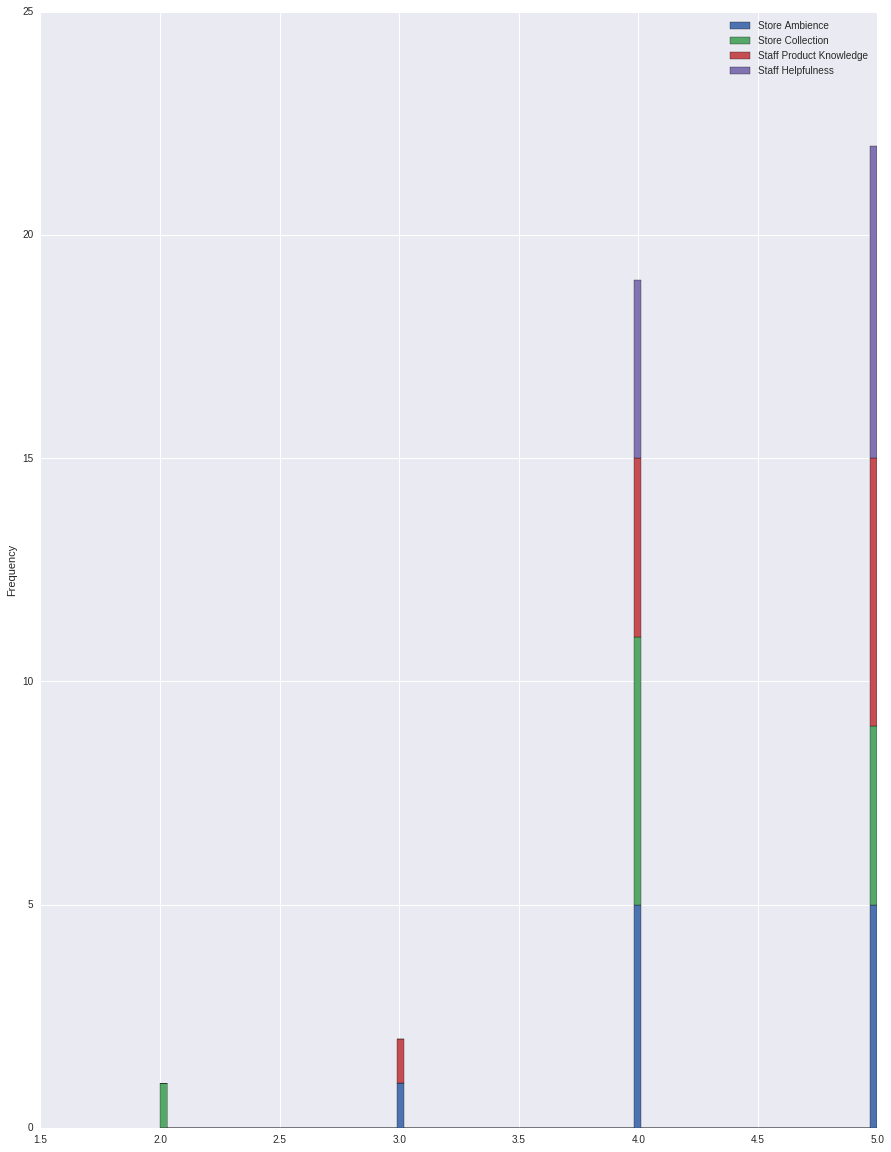

In [118]:
df10[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

In [137]:
pd.set_option('display.max_colwidth', -1)

In [123]:
for word in list(l):  
    l.remove(u'NaN')

ValueError: list.remove(x): x not in list

# Wordcloud of comments

In [125]:
s=' '.join(l)
whitelist = set('abcdefghijklmnopqrstuvwxy ABCDEFGHIJKLMNOPQRSTUVWXYZ')
answer = ''.join(filter(whitelist.__contains__,s))
wordcloud = WordCloud(background_color="white",
                          width=1200, height=1000).generate(answer)
mat.pyplot.figure(figsize=(30,50))
mat.pyplot.imshow(wordcloud, interpolation="bilinear")
mat.pyplot.axis("off")
mat.pyplot.margins(x=0, y=0)
mat.pyplot.show()

In [126]:
df10['Comment']

33576                                                 NaN
33888                              No suggestions at all.
33904                                                 NaN
34389                                 Ggh8hgggfjiihhggfff
34861                                                 NaN
35046                                                 NaN
35694                        Keep doing same efforts _��_
35936                                                 NaN
36004          Dont send msg for feedback again and again
36332                                 Soprt shoes Abilble
37006    Need to stock up more especially kids stuff too.
37534                                                 NaN
37552                                                 NaN
37779                                                 NaN
Name: Comment, dtype: object

# Analysis of store location "MAS-MUMBAI AIRPORT(M)"

In [127]:
df11=df2.loc[df2['Store Location(Touchpoint name)'] == 'MAS- MUMBAI AIR PORT( M )']
df11.head()

Store Location(Touchpoint name) Date of Request Date of Response  \
29194       MAS- MUMBAI AIR PORT( M )  10/05/18 16:39   10/05/18 16:52   
30027       MAS- MUMBAI AIR PORT( M )  14/05/18 16:45   14/05/18 18:42   
30855       MAS- MUMBAI AIR PORT( M )  18/05/18 14:49   18/05/18 14:53   
30911       MAS- MUMBAI AIR PORT( M )  18/05/18 14:49   18/05/18 16:16   
31160       MAS- MUMBAI AIR PORT( M )  19/05/18 16:19   19/05/18 18:33   

      Language Date of Transaction  \
29194  english            08/05/18   
30027  english            13/05/18   
30855  english            17/05/18   
30911  english            17/05/18   
31160  english            18/05/18   

                                        Product Category Responded Using  \
29194                             GNX SAND/KHILON, CROCS      INVITATION   
30027                     CHP-FLT/DAB/CUT, ZIOLITE, MULE      INVITATION   
30855  SKECHERS-LT, CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT,...      INVITATION   
30911                                           SKECHERS      INVITATION   
31160                           SANDAL (LT), SANDAL (LT)      INVITATION   

      Storeid  Overall Experience Score  \
29194     MAS                       5.0   
30027     MAS                       3.0   
30855     MAS                       4.0   
30911     MAS                       4.0   
31160     MAS                       5.0   

                                         Comment    Value  Store Ambience  \
29194                      Welldone Keep It Up !   5285.0             4.0   
30027                                        NaN   3320.0             3.0   
30855                    Sige deference requires  12978.0             3.0   
30911        Please ask them to deliver it ASAP.   5499.0             4.0   
31160  More choice preferable in ladies'footwear   2580.0             4.0   

       Store Collection  Staff Product Knowledge  Staff Helpfulness  Log Value  
29194               4.0                      5.0                5.0   8.572628  
30027               3.0                      3.0                3.0   8.107720  
30855               4.0                      3.0                4.0   9.471011  
30911               4.0                      4.0                3.0   8.612322  
31160               4.0                      4.0                4.0   7.855545

In [128]:
df11.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19 entries, 29194 to 37641
Data columns (total 16 columns):
Store Location(Touchpoint name)    19 non-null object
Date of Request                    19 non-null object
Date of Response                   19 non-null object
Language                           19 non-null object
Date of Transaction                19 non-null object
Product Category                   19 non-null object
Responded Using                    19 non-null object
Storeid                            19 non-null object
Overall Experience Score           19 non-null float64
Comment                            15 non-null object
Value                              19 non-null float64
Store Ambience                     18 non-null float64
Store Collection                   18 non-null float64
Staff Product Knowledge            18 non-null float64
Staff Helpfulness                  18 non-null float64
Log Value                          19 non-null float64
dtypes: float64(7),

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ada349a10>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ad975cf50>]], dtype=object)

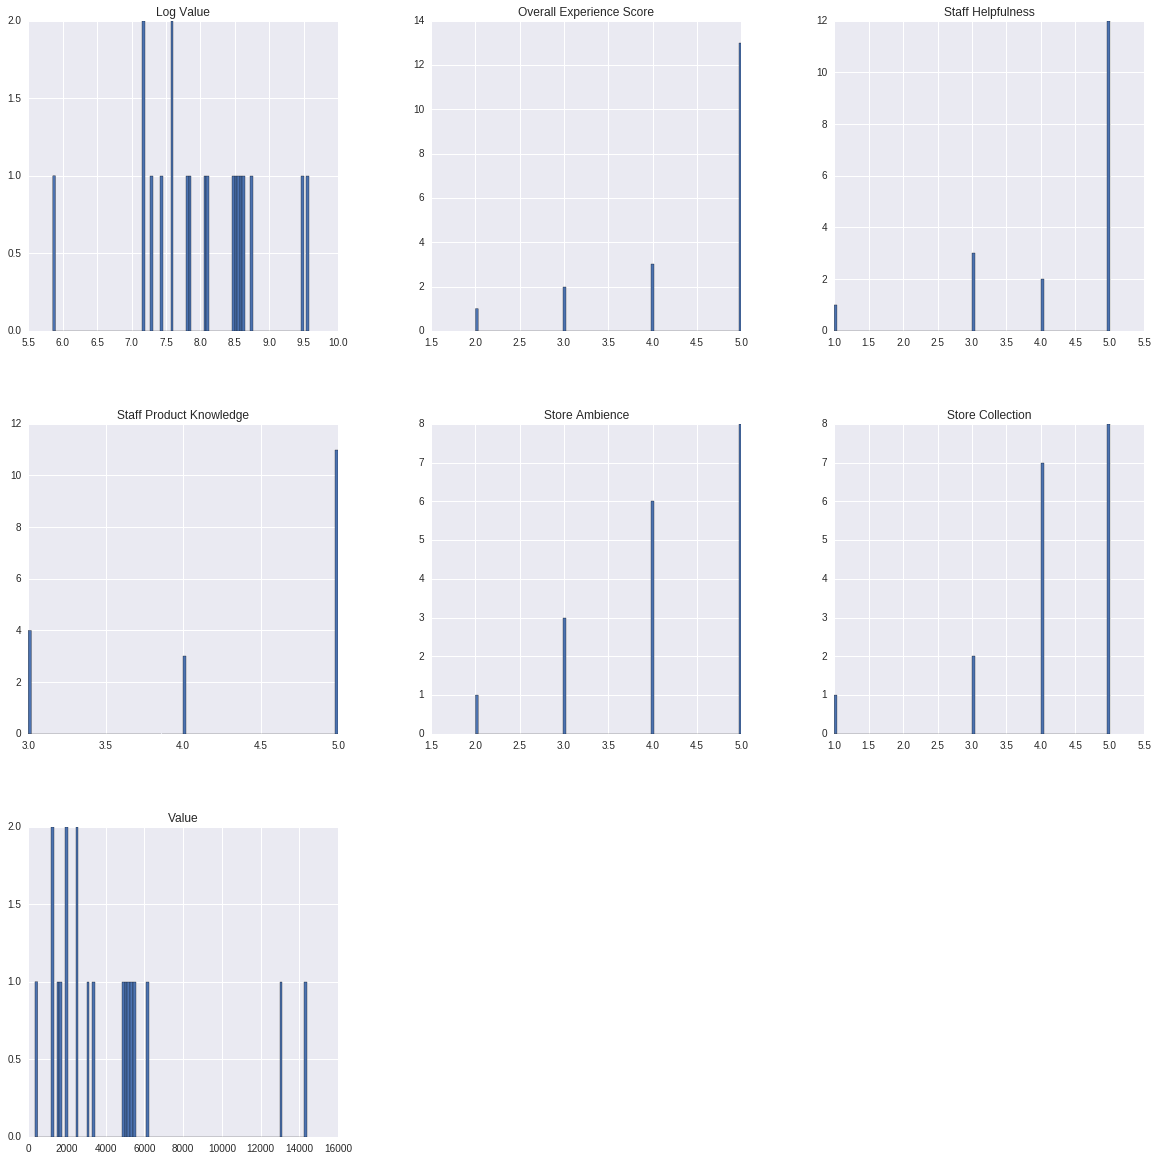

In [129]:
df11.hist(bins=100,figsize=(20,20))

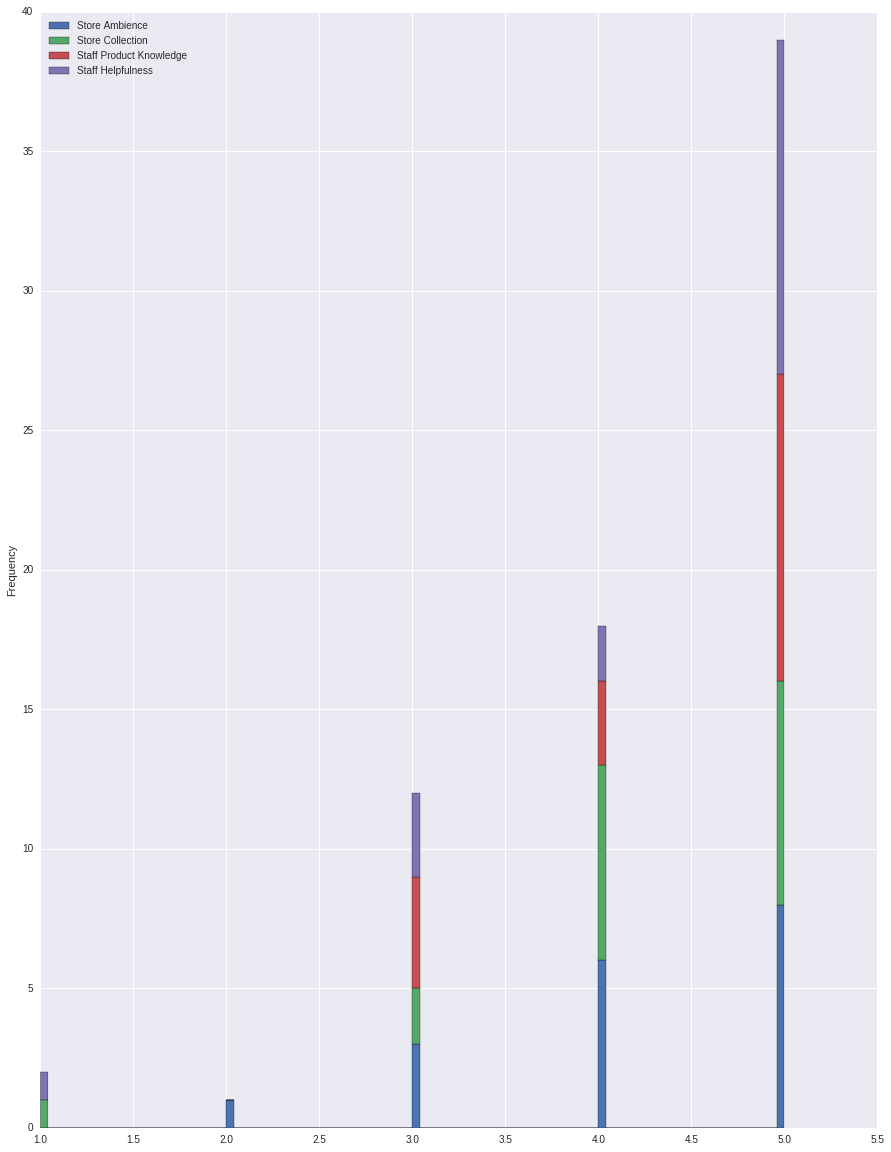

In [130]:
df11[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

In [138]:
df11['Comment']

29194    Welldone Keep It Up !                                                                                                                                                                                                                                                                                                                                                       
30027    NaN                                                                                                                                                                                                                                                                                                                                                                         
30855    Sige deference requires                                                                                                                                                                                                                            

# Analysis of store location "JHR-JAMSHEDPUR"

In [132]:
df12=df2.loc[df2['Store Location(Touchpoint name)'] == 'JHR- JAMSHEDPUR']
df12.head()

Store Location(Touchpoint name) Date of Request Date of Response  \
35716                 JHR- JAMSHEDPUR  07/06/18 16:55   07/06/18 17:51   
35948                 JHR- JAMSHEDPUR  08/06/18 16:46   08/06/18 17:29   
36200                 JHR- JAMSHEDPUR  08/06/18 16:46   09/06/18 18:07   
36241                 JHR- JAMSHEDPUR  08/06/18 16:46   09/06/18 20:08   
36253                 JHR- JAMSHEDPUR  08/06/18 16:46   09/06/18 22:49   

      Language Date of Transaction Product Category Responded Using Storeid  \
35716  english            06/06/18      MULE, SOCKS      INVITATION     JHR   
35948    hindi            07/06/18   DAB/PLAT (GRL)      INVITATION     JHR   
36200  english            07/06/18    PLATFORM (LT)        REMINDER     JHR   
36241    hindi            07/06/18      SANDAL (LT)        REMINDER     JHR   
36253  english            07/06/18       LOOSE HEEL        REMINDER     JHR   

       Overall Experience Score  \
35716                       5.0   
35948                       3.0   
36200                       5.0   
36241                       5.0   
36253                       5.0   

                                                 Comment   Value  \
35716                                  Latest collection  1320.0   
35948  �_��__�_�����_� �__����_ш__�__�_� �_��__��ۈ_� ...  1290.0   
36200                Collection is good, want more of it  1390.0   
36241                                  acha anubhav raha  1690.0   
36253                                  More stuff needed  1290.0   

       Store Ambience  Store Collection  Staff Product Knowledge  \
35716             5.0               4.0                      5.0   
35948             3.0               2.0                      3.0   
36200             5.0               5.0                      5.0   
36241             4.0               4.0                      3.0   
36253             3.0               3.0                      4.0   

       Staff Helpfulness  Log Value  
35716                5.0   7.185387  
35948                3.0   7.162397  
36200                5.0   7.237059  
36241                3.0   7.432484  
36253                4.0   7.162397

In [133]:
df12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21 entries, 35716 to 37737
Data columns (total 16 columns):
Store Location(Touchpoint name)    21 non-null object
Date of Request                    21 non-null object
Date of Response                   21 non-null object
Language                           21 non-null object
Date of Transaction                21 non-null object
Product Category                   21 non-null object
Responded Using                    21 non-null object
Storeid                            21 non-null object
Overall Experience Score           21 non-null float64
Comment                            17 non-null object
Value                              21 non-null float64
Store Ambience                     20 non-null float64
Store Collection                   20 non-null float64
Staff Product Knowledge            20 non-null float64
Staff Helpfulness                  20 non-null float64
Log Value                          21 non-null float64
dtypes: float64(7),

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1ad969a950>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1acd01e3d0>]], dtype=object)

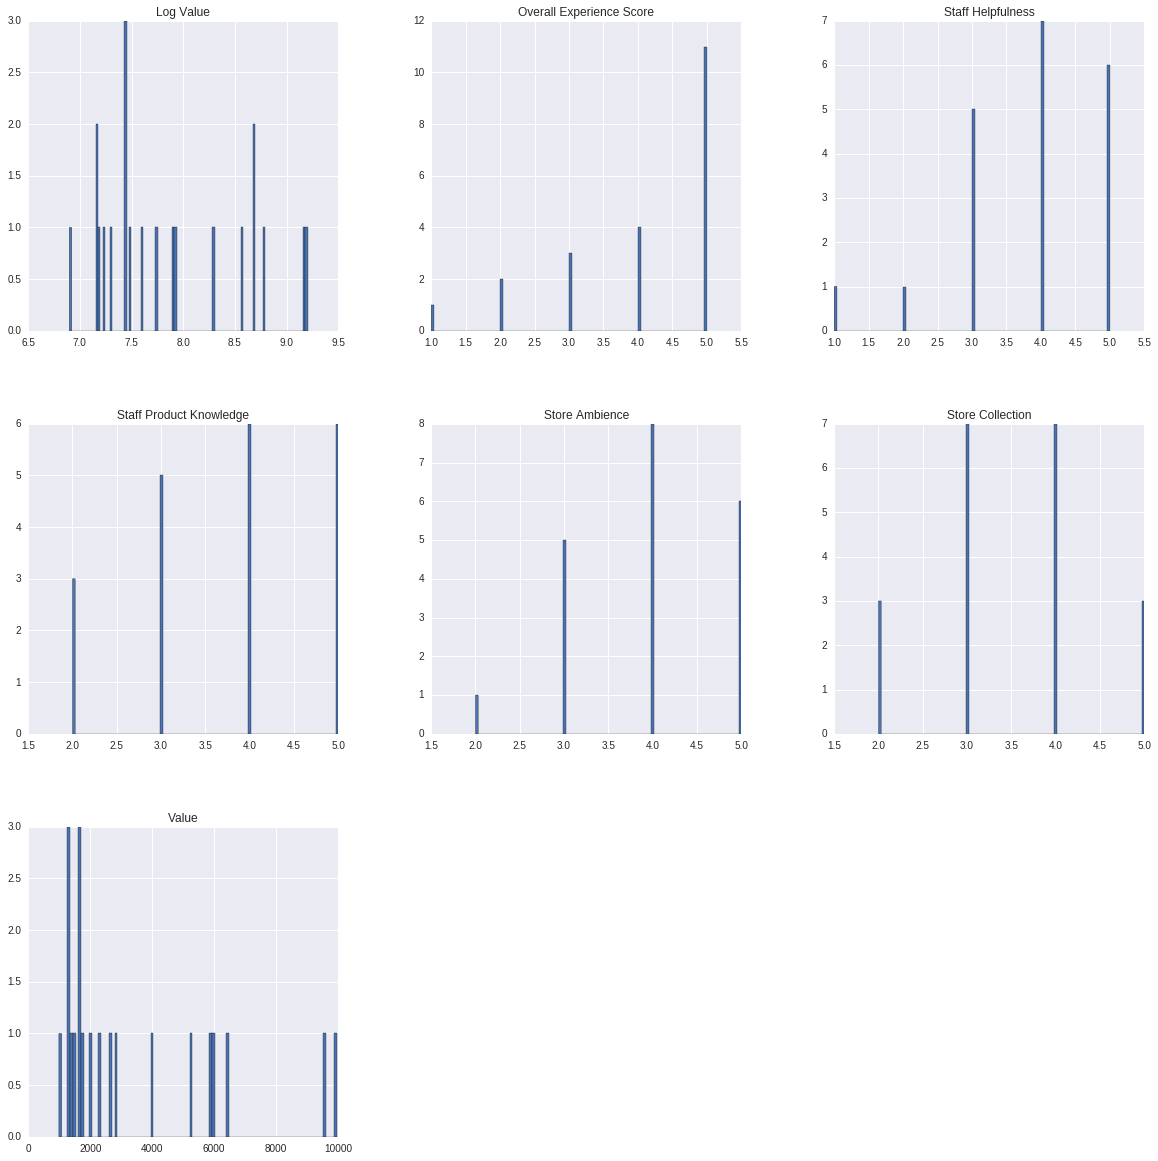

In [134]:
df12.hist(bins=100,figsize=(20,20))

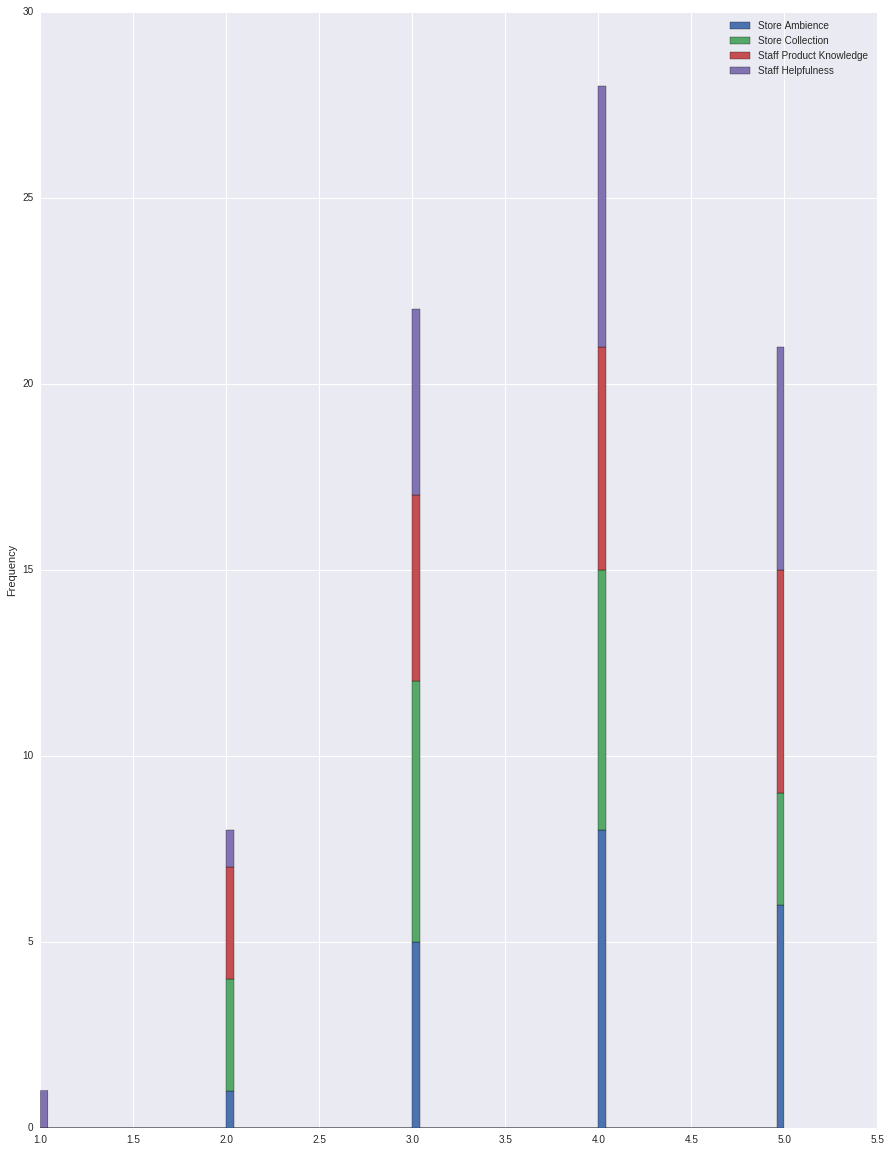

In [135]:
df12[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

In [139]:
df12['Comment']

35716    Latest collection                                                                                                                                                                                                     
35948    �_��__�_�����_� �__����_ш__�__�_� �_��__��ۈ_� �_��__��_ �__��܈_��__ �__�__�__�_��_�                                                                                                                                   
36200    Collection is good, want more of it                                                                                                                                                                                   
36241    acha anubhav raha                                                                                                                                                                                                     
36253    More stuff needed                                                                              

# Analysis of store location "BHR-BANGALURU"

In [140]:
df13=df2.loc[df2['Store Location(Touchpoint name)'] == 'BHR-BANGALURU']
df13.head()

Store Location(Touchpoint name) Date of Request Date of Response  \
26145  BHR-BANGALURU                   01/05/18 11:03  01/05/18 12:22    
26814  BHR-BANGALURU                   01/05/18 11:03  02/05/18 17:40    
27925  BHR-BANGALURU                   05/05/18 16:15  05/05/18 16:23    
28683  BHR-BANGALURU                   07/05/18 17:17  08/05/18 17:52    
30216  BHR-BANGALURU                   14/05/18 16:43  15/05/18 18:08    

      Language Date of Transaction  \
26145  english  29/04/18             
26814  english  29/04/18             
27925  english  04/05/18             
28683  english  05/05/18             
30216  english  13/05/18             

                                                     Product Category  \
26145  SANDAL (LT), CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT, CHP-FLT/DAB/CUT   
26814  CROCS                                                            
27925  CASUAL BAGS, CASUAL BAGS                                         
28683  CHP-FLT/DAB/CUT                                                  
30216  MULE, ZIOLITE                                                    

      Responded Using Storeid  Overall Experience Score  \
26145  INVITATION      BHR     5.0                        
26814  REMINDER        BHR     4.0                        
27925  INVITATION      BHR     5.0                        
28683  INVITATION      BHR     4.0                        
30216  REMINDER        BHR     5.0                        

                                                                                                                                                     Comment  \
26145  Happy to shop in brand , we are regular customer to commercial street branch and we are very happy to ve your show room very near to our home , happy   
26814  Nice place!                                                                                                                                             
27925  NaN                                                                                                                                                     
28683  NaN                                                                                                                                                     
30216  .......                                                                                                                                                 

        Value  Store Ambience  Store Collection  Staff Product Knowledge  \
26145  4860.0  5.0             5.0               5.0                       
26814  2495.0  4.0             4.0               3.0                       
27925  1380.0  4.0             3.0               3.0                       
28683  1290.0  4.0             4.0               4.0                       
30216  1630.0  4.0             4.0               4.0                       

       Staff Helpfulness  Log Value  
26145  5.0                8.488794   
26814  4.0                7.822044   
27925  4.0                7.229839   
28683  4.0                7.162397   
30216  4.0                7.396335

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f1accf5ded0>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x7f1ad8a3b4d0>]], dtype=object)

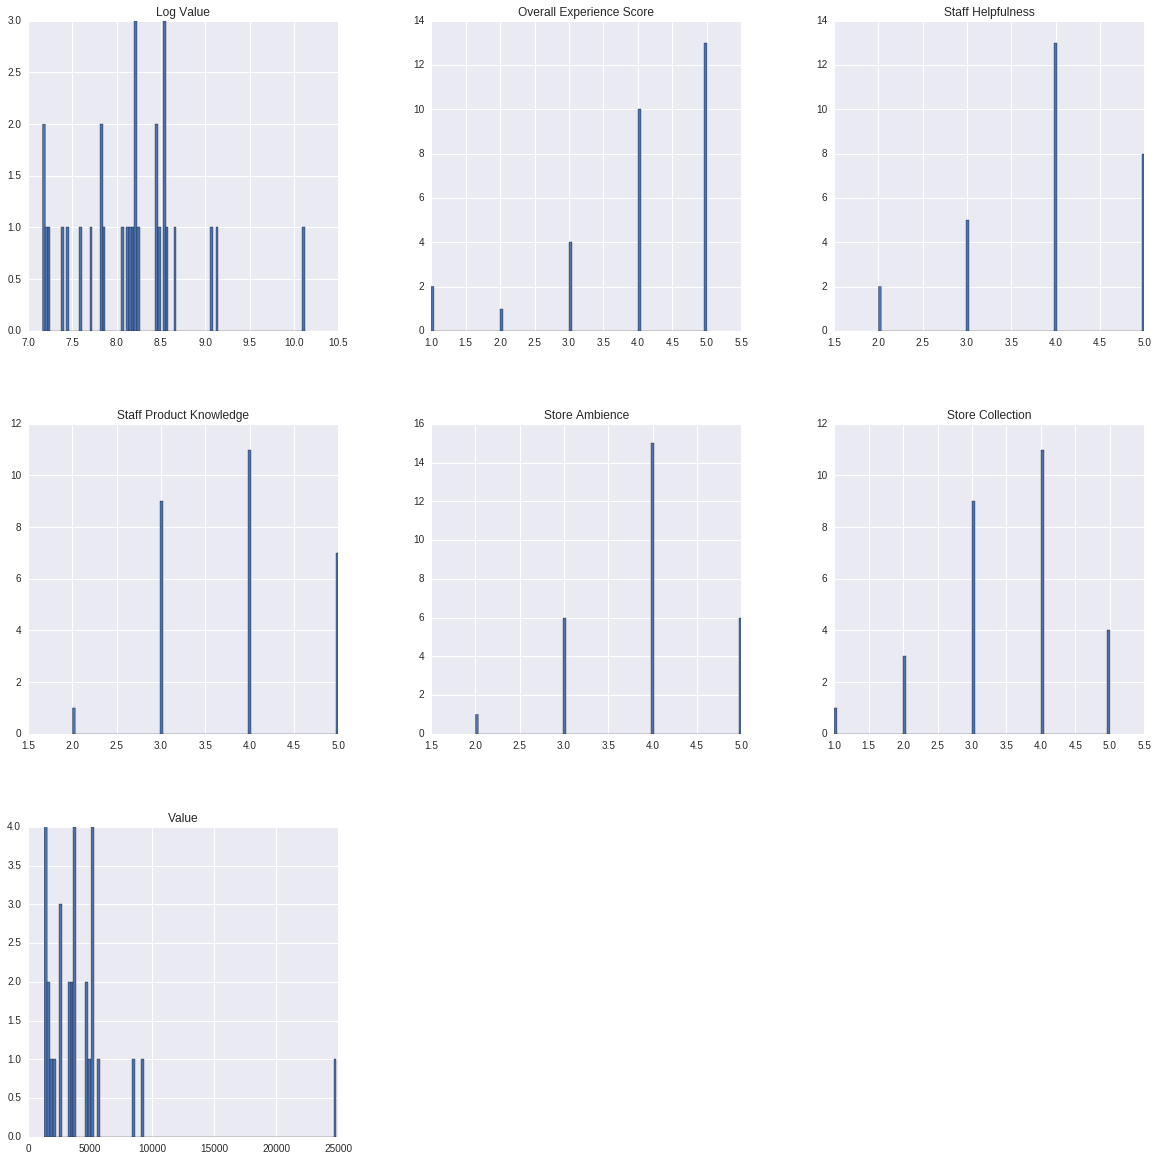

In [141]:
df13.hist(bins=100,figsize=(20,20))

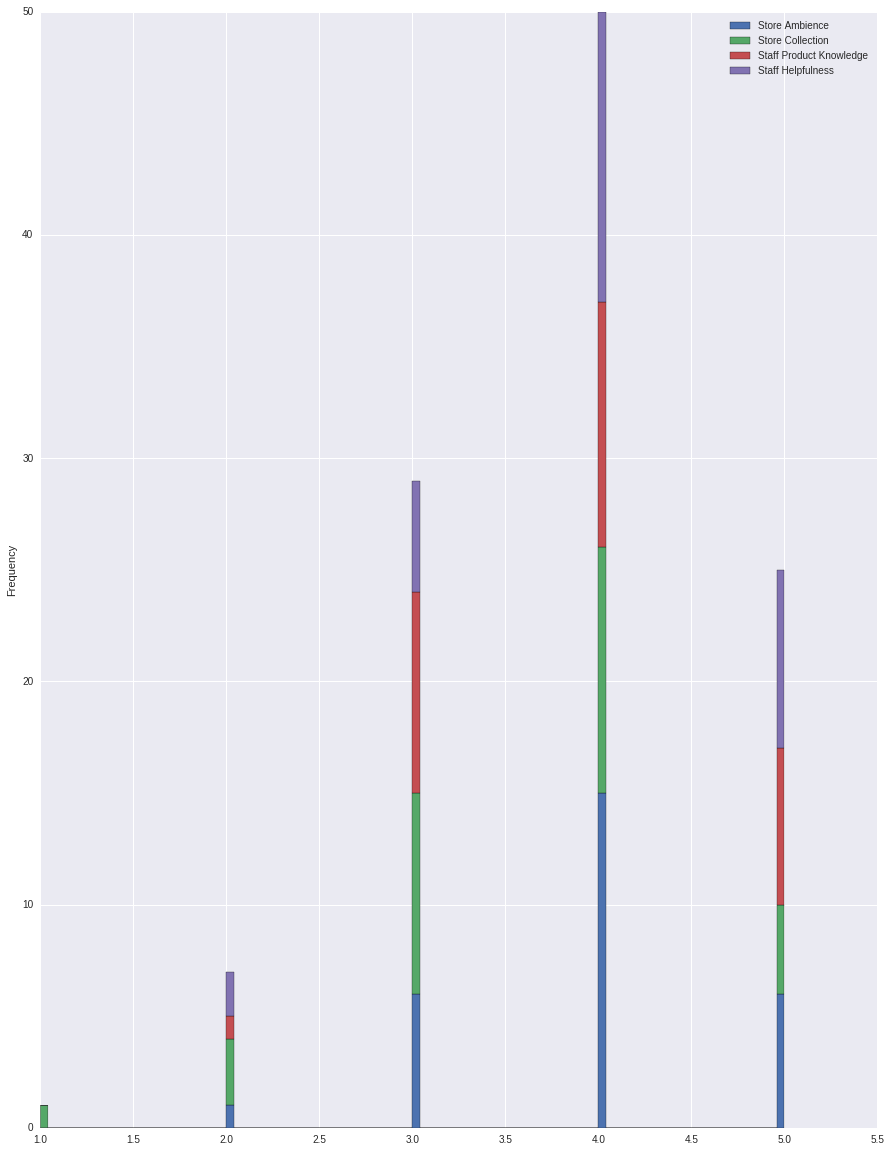

In [143]:
df13[['Store Ambience','Store Collection','Staff Product Knowledge','Staff Helpfulness']].plot.hist(stacked=True, bins=100,figsize=(15,20))

In [144]:
df13['Comment']

26145    Happy to shop in brand , we are regular customer to commercial street branch and we are very happy to ve your show room very near to our home , happy                                                                                                                                                
26814    Nice place!                                                                                                                                                                                                                                                                                          
27925    NaN                                                                                                                                                                                                                                                                                                  
28683    NaN                                                                               